<h1 style=text-align:center;>Battery Management System</h1>

<h2>Data Description</h2>
<p>A set of four Li-ion batteries (# 29, 30, 31 and 32) were run through 3 different operational profiles (charge, discharge and impedance) at elevated ambient temperature (43 deg C).</p>
<p>Charging was carried out in a constant current (CC) mode at 1.5A until the battery voltage reached 4.2V and then continued in a constant voltage (CV) mode until the charge current dropped to 20mA.</p>
<p>Discharge was carried out at 4A until the battery voltage fell to 2.0V, 2.2V, 2.5V and 2.7V for batteries 29, 30, 31 and 32 respectively.</p>
<p>Impedance measurement was carried out through an electrochemical impedance spectroscopy (EIS) frequency sweep from 0.1Hz to 5kHz.</p>

<h2>Data Structure</h2>
<p>Cycle:Top level structure array containing the charge, discharge and impedance operations</p>
<ul>
    <li>Type: operation type, can be charge, discharge or impedance</li>
    <li>Ambient_temperature: ambient temperature (degree C)</li>
    <li>Time: the date and time of the start of the cycle, in MATLAB  date vector format</li>
    <li>Data: data structure containing the measurements</li>
</ul>
    <p>For charge the fields are:<p>
    <ul>
        <li>Voltage_measured: 	Battery terminal voltage (Volts)</li>
        <li>Current_measured:	Battery output current (Amps)</li>
        <li>Temperature_measured: 	Battery temperature (degree C)</li>
        <li>Current_charge:		Current measured at charger (Amps)</li>
        <li>Voltage_charge:		Voltage measured at charger (Volts)</li>
        <li>Time:			Time vector for the cycle (secs)</li>    
    </ul>
    <p>For discharge the fields are:</p>
    <ul>
        <li>Voltage_measured: 	Battery terminal voltage (Volts)</li>
        <li>Current_measured:	Battery output current (Amps)</li>
        <li>Temperature_measured: 	Battery temperature (degree C)</li>
        <li>Current_charge:		Current measured at charger (Amps)</li>
        <li>Voltage_charge:		Voltage measured at charger (Volts)</li>
        <li>Time:			Time vector for the cycle (secs)</li>
        <li>Capacity:		Battery capacity (Ahr) for discharge till 2.7V</li>
    </ul>
    <p>For impedance the fields are:</p>
    <ul>
        <li>Sense_current:		Current in sense branch (Amps)</li>
        <li>Battery_current:	Current in battery branch (Amps)</li>
        <li>Current_ratio:		Ratio of the above currents </li>
        <li>Battery_impedance:	Battery impedance (Ohms) computed from raw data</li>
        <li>Rectified_impedance:	Calibrated and smoothed battery impedance (Ohms)</li>
        <li>Re:			Estimated electrolyte resistance (Ohms)</li>
        <li>Rct:			Estimated charge transfer resistance (Ohms)</li>
    </ul>

<h3>Importing the Libraries</h3>

In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
import os
import json
import datetime
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
import shutil
sns.set()

<h3>Working on Matlab Data to readble Json format</h3>

In [2]:
#Converting .mat file to json file
def convert_json_discharge(lis):
    discharge=dict()
    for i,ele in enumerate(lis):
        type_=ele[0]
        if(type_=='discharge'):
            discharge[str(i)]={}
            discharge[str(i)]['ambient_temperature']=str(ele[1][0][0])
            year=int(ele[2][0][0])
            month=int(ele[2][0][1])
            day=int(ele[2][0][2])
            hour=int(ele[2][0][3])
            minute=int(ele[2][0][4])
            second=int(ele[2][0][5])
            time=datetime.datetime(year,month,day,hour,minute,second)
            discharge[str(i)]['time']=time.strftime('%Y %m %d,%H:%M:%S')
            
            '''date_time=datetime.datetime(int(ele[2][0][0]),
                                       int(ele[2][0][1]),
                                       int(ele[2][0][2]),
                                       int(ele[2][0][3]),
                                       int(ele[2][0][4]))+datetime.timedelta(seconds=int(ele[2][0][5]))'''
            #for j in range(len(data[0][0][0][0].tolist())):
            discharge[str(i)]['Voltage_measured']=ele[3][0][0][0][0].tolist()
            discharge[str(i)]['Current_measured']=ele[3][0][0][1][0].tolist()
            discharge[str(i)]['Temperature_measured']=ele[3][0][0][2][0].tolist()
            discharge[str(i)]['Current_charge']=ele[3][0][0][3][0].tolist()
            discharge[str(i)]['Voltage_charge']=ele[3][0][0][4][0].tolist()
            discharge[str(i)]['Time']=ele[3][0][0][5][0].tolist()
            discharge[str(i)]['Capacity']=ele[3][0][0][6][0][0].tolist()
    return discharge




def convert_json_charge(lis):
    charge=dict()
    for i,ele in enumerate(lis):
        type_=ele[0]
        if(type_=='charge'):
            charge[str(i)]={}
            charge[str(i)]['ambient_temperature']=str(ele[1][0][0])
            year=int(ele[2][0][0])
            month=int(ele[2][0][1])
            day=int(ele[2][0][2])
            hour=int(ele[2][0][3])
            minute=int(ele[2][0][4])
            second=int(ele[2][0][5])
            time=datetime.datetime(year,month,day,hour,minute,second)
            charge[str(i)]['time']=time.strftime('%Y %m %d,%H:%M:%S')
            
            '''date_time=datetime.datetime(int(ele[2][0][0]),
                                       int(ele[2][0][1]),
                                       int(ele[2][0][2]),
                                       int(ele[2][0][3]),
                                       int(ele[2][0][4]))+datetime.timedelta(seconds=int(ele[2][0][5]))'''
            #for j in range(len(data[0][0][0][0].tolist())):
            charge[str(i)]['Voltage_measured']=ele[3][0][0][0][0].tolist()
            charge[str(i)]['Current_measured']=ele[3][0][0][1][0].tolist()
            charge[str(i)]['Temperature_measured']=ele[3][0][0][2][0].tolist()
            charge[str(i)]['Current_charge']=ele[3][0][0][3][0].tolist()
            charge[str(i)]['Voltage_charge']=ele[3][0][0][4][0].tolist()
            charge[str(i)]['Time']=ele[3][0][0][5][0].tolist()
            #charge[str(i)]['Capacity']=ele[3][0][0][6][0][0].tolist()
    return charge























In [3]:

def model_dump(list,names):
    with open(names+'.json','w') as json_file:
        json.dump(list,json_file,indent=2)

In [4]:
folders='./Dataset'
mat_files=[i for i in os.listdir(folders) if i.endswith('mat')]

for file in mat_files:
    file_name=file.split('.mat')[0]
    print(file_name)
    load_mat_file=loadmat(folders+'/'+file)
    lis=load_mat_file[file_name][0][0][0][0]
    
    discharge=convert_json_discharge(lis)
    charge=convert_json_charge(lis)
    model_dump(discharge,file_name+'-discharge')
    model_dump(charge,file_name+'-charge')

B0029


In [5]:
files_=['B0029-charge.json','B0029-discharge.json']
for i in files_:
    shutil.move(i,'./Dataset')

<h3>Viewing the Data</h3>

In [6]:
data1=loadmat('Dataset/B0029.mat')['B0029']
data1

array([[(array([[(array(['impedance'], dtype='<U9'), array([[43]], dtype=uint8), array([[2009.   ,    4.   ,    7.   ,   15.   ,   59.   ,   18.718]]), array([[(array([[809.12634277 -17.11935616j, 798.63830566 -29.41183472j,
        799.62786865 -39.47426987j, 800.12701416 -49.21696091j,
        797.42474365 -48.8081131j , 797.95776367 -52.85759735j,
        793.94177246 -58.11167145j, 794.54663086 -61.78377533j,
        794.92297363 -65.04737854j, 794.62207031 -63.56415939j,
        794.25915527 -58.87751389j, 791.82250977 -59.76362991j,
        792.72540283 -58.70359802j, 793.27880859 -61.02146149j,
        790.51171875 -59.29131699j, 793.91442871 -41.67956543j,
        790.79705811 -41.59541321j, 789.6060791  -41.25009918j,
        792.33239746 -43.23292542j, 791.09802246 -44.36709595j,
        789.66882324 -42.23098373j, 789.83343506  -2.33620453j,
        789.95422363  -4.14589691j, 788.25299072  -4.30204773j,
        790.34204102  -4.47595596j, 787.01293945  -3.86309242j,
       

In [7]:
#Checking the total length for discharge type
s=0
for i in range(len(data1[0][0][0][0])):
    if data1[0][0][0][0][i][0][0]=='discharge':
        s=s+len(data1[0][0][0][0][i][3][0][0][0][0])
print(s)


6351


In [8]:
#Checking the total length for charge type
s=0
for i in range(len(data1[0][0][0][0])):
    if data1[0][0][0][0][i][0][0]=='charge':
        s=s+len(data1[0][0][0][0][i][3][0][0][0][0])
print(s)

104136


<h3>Loading Discharge Json as DataFrame</h3>

In [9]:
df=pd.read_json(r'C:\Users\srini\Desktop\Battery Management System\Dataset\B0029-discharge.json')
df

,1,3,5,7,9,13,15,17,19,21,...,73,75,77,79,81,85,87,89,91,93
ambient_temperature,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
time,"2009 04 07,16:31:01","2009 04 07,19:44:26","2009 04 07,22:58:18","2009 04 08,02:11:30","2009 04 08,05:23:26","2009 04 09,10:24:58","2009 04 09,13:33:59","2009 04 09,16:42:43","2009 04 09,19:50:50","2009 04 09,22:58:17",...,"2009 04 16,10:13:36","2009 04 16,13:14:46","2009 04 16,16:16:19","2009 04 16,19:17:26","2009 04 16,22:17:17","2009 04 17,09:45:34","2009 04 17,12:46:29","2009 04 17,15:46:53","2009 04 17,18:47:33","2009 04 17,21:46:23"
Voltage_measured,"[4.122635846291491, 4.122758586822445, 3.80454...","[4.201233252636135, 4.201345768013819, 3.89109...","[4.20059335047502, 4.20075138362936, 3.8914604...","[4.200991114400989, 4.20121939681188, 3.891923...","[4.201296240053268, 4.2015173459585196, 3.8925...","[4.190262887134144, 4.190431936024234, 3.87930...","[4.20147284332843, 4.20151685379873, 3.8925170...","[4.201179017259204, 4.201511694320507, 3.89226...","[4.201494746033988, 4.201805179645606, 3.89204...","[4.201381743397299, 4.201438773335668, 3.89228...",...,"[4.195506217299026, 4.195839706712194, 3.87891...","[4.199772540774015, 4.20011947590298, 3.882764...","[4.199940712486744, 4.20020354565233, 3.882444...","[4.199475681445826, 4.200021865512612, 3.88196...","[4.200297140244301, 4.200544725415334, 3.88211...","[4.193855962965672, 4.193996290293578, 3.87492...","[4.199807562252483, 4.199738187114399, 3.88102...","[4.199219461815915, 4.199665175987453, 3.88041...","[4.200066757484033, 4.200099273216301, 3.88041...","[4.199896848400753, 4.200080632238881, 3.87970..."
Current_measured,"[-0.000607434913611, -0.00032066021316900004, ...","[3.6462722481104854e-05, 0.00015848618875, -4....","[-0.0010685436543600001, -0.000725285781233, -...","[-0.001341828724811, 0.0008850584926100001, -4...","[0.004024554850396001, -0.000229560460534, -4....","[0.0016011471718590002, 0.00103044046251, -4.0...","[0.000714439467111, 0.0009277908051380001, -4....","[-0.001185002797231, 0.0030934226291670004, -4...","[-0.001976674245528, 6.222737166087956e-05, -4...","[0.000975706277499, 0.0023072676102560002, -4....",...,"[-0.001255703293955, -0.00108501354568, -4.023...","[-0.00242105382432, -0.000151257108603, -4.025...","[-0.001804769730411, 0.0009569528423220001, -4...","[-0.002763773149728, 0.0017607176685100001, -4...","[-0.004323494561551, -0.0009574527312210001, -...","[0.001077661361211, -0.000837173683138, -4.022...","[-0.000602700128679, -0.0027423693124350003, -...","[0.000795989977969, -3.41911675600066e-06, -4....","[-0.000598823342773, -0.002231372032734, -4.02...","[-0.00251485883431, -0.00094044118648, -4.0252..."
Temperature_measured,"[43.41517780938604, 43.406265771768616, 43.443...","[44.6512950787826, 44.65675516231354, 44.68997...","[44.70540831920739, 44.703793008883345, 44.729...","[44.70284265888931, 44.70747744688631, 44.7229...","[44.703367240495666, 44.69471969782321, 44.741...","[44.658893917027946, 44.65632079442231, 44.697...","[44.70657486437913, 44.68760486959879, 44.7220...","[44.675584452215, 44.691531219824874, 44.72478...","[44.65379509474975, 44.67861736442547, 44.7277...","[44.71566516283566, 44.691080314771256, 44.699...",...,"[44.60923646358358, 44.642564326357345, 44.666...","[44.657908969411466, 44.672174027054936, 44.72...","[44.679724363741826, 44.650393271280834, 44.68...","[44.665020318318945, 44.66166028239045, 44.686...","[44.67321703266597, 44.67197301409441, 44.6994...","[44.60925310792597, 44.629281427169275, 44.674...","[44.651733083497575, 44.70040320319792, 44.692...","[44.624308005806974, 44.64342273872713, 44.655...","[44.684149828783205, 44.72318593880648, 44.731...","[44.68322152965014, 44.66301381472874, 44.7248..."
Current_charge,"[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ..

In [10]:
#Transposing the rows and columns
df_discharge=df.transpose()
df_discharge

,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity
1,43,"2009 04 07,16:31:01","[4.122635846291491, 4.122758586822445, 3.80454...","[-0.000607434913611, -0.00032066021316900004, ...","[43.41517780938604, 43.406265771768616, 43.443...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.138, 1.854, 1.82, 1.806, 1.78900000000...","[0.0, 9.358999999999998, 19.453, 28.7810000000...",1.69751
3,43,"2009 04 07,19:44:26","[4.201233252636135, 4.201345768013819, 3.89109...","[3.6462722481104854e-05, 0.00015848618875, -4....","[44.6512950787826, 44.65675516231354, 44.68997...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.217, 1.975, 1.963, 1.951, 1.936, 1.92,...","[0.0, 9.312000000000005, 19.469, 28.812, 38.20...",1.8447
5,43,"2009 04 07,22:58:18","[4.20059335047502, 4.20075138362936, 3.8914604...","[-0.0010685436543600001, -0.000725285781233, -...","[44.70540831920739, 44.703793008883345, 44.729...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.216, 1.974, 1.9649999999999999, 1.953,...","[0.0, 9.265999999999998, 19.531, 28.9839999999...",1.82544
7,43,"2009 04 08,02:11:30","[4.200991114400989, 4.20121939681188, 3.891923...","[-0.001341828724811, 0.0008850584926100001, -4...","[44.70284265888931, 44.70747744688631, 44.7229...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.9649999999999999, 1.962, 1.951,...","[0.0, 9.375, 19.656000000000006, 29.1560000000...",1.81575
9,43,"2009 04 08,05:23:26","[4.201296240053268, 4.2015173459585196, 3.8925...","[0.004024554850396001, -0.000229560460534, -4....","[44.703367240495666, 44.69471969782321, 44.741...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.96, 1.956, 1.944, 1.928, 1.913,...","[0.0, 9.359000000000002, 19.702999999999996, 2...",1.8133
13,43,"2009 04 09,10:24:58","[4.190262887134144, 4.190431936024234, 3.87930...","[0.0016011471718590002, 0.00103044046251, -4.0...","[44.658893917027946, 44.65632079442231, 44.697...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.206, 1.9500000000000002, 1.90600000000...","[0.0, 9.358999999999998, 19.718999999999998, 2...",1.81516
15,43,"2009 04 09,13:33:59","[4.20147284332843, 4.20151685379873, 3.8925170...","[0.000714439467111, 0.0009277908051380001, -4....","[44.70657486437913, 44.68760486959879, 44.7220...","[0.0006000000000000001, 0.0004, 3.995, 3.995, ...","[0.0, 4.217, 1.928, 1.9220000000000002, 1.916,...","[0.0, 9.343999999999998, 19.781000000000002, 2...",1.81433
17,43,"2009 04 09,16:42:43","[4.201179017259204, 4.201511694320507, 3.89226...","[-0.001185002797231, 0.0030934226291670004, -4...","[44.675584452215, 44.691531219824874, 44.72478...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.217, 1.943, 1.9340000000000002, 1.9220...","[0.0, 9.375, 19.906, 29.593000000000004, 39.39...",1.80134
19,43,"2009 04 09,19:50:50","[4.201494746033988, 4.201805179645606, 3.89204...","[-0.001976674245528, 6.222737166087956e-05, -4...","[44.65379509474975, 44.67861736442547, 44.7277...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.9100000000000001, 1.91000000000...","[0.0, 9.312, 19.936999999999998, 29.734, 39.56...",1.78816
21,43,"2009 04 09,22:58:17","[4.201381743397299, 4.201438773335668, 3.89228...","[0.000975706277499, 0.0023072676102560002, -4....","[44.71566516283566, 44.691080314771256, 44.699...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.925, 1.912, 1.908, 1.892, 1.878...","[0.0, 9.343000000000004, 19.921, 29.718, 39.51...",1.77607


In [11]:
#Setting the new index range
df_discharge.set_index([np.arange(1,41,1)],inplace=True)
df_discharge


,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity
1,43,"2009 04 07,16:31:01","[4.122635846291491, 4.122758586822445, 3.80454...","[-0.000607434913611, -0.00032066021316900004, ...","[43.41517780938604, 43.406265771768616, 43.443...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.138, 1.854, 1.82, 1.806, 1.78900000000...","[0.0, 9.358999999999998, 19.453, 28.7810000000...",1.69751
2,43,"2009 04 07,19:44:26","[4.201233252636135, 4.201345768013819, 3.89109...","[3.6462722481104854e-05, 0.00015848618875, -4....","[44.6512950787826, 44.65675516231354, 44.68997...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.217, 1.975, 1.963, 1.951, 1.936, 1.92,...","[0.0, 9.312000000000005, 19.469, 28.812, 38.20...",1.8447
3,43,"2009 04 07,22:58:18","[4.20059335047502, 4.20075138362936, 3.8914604...","[-0.0010685436543600001, -0.000725285781233, -...","[44.70540831920739, 44.703793008883345, 44.729...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.216, 1.974, 1.9649999999999999, 1.953,...","[0.0, 9.265999999999998, 19.531, 28.9839999999...",1.82544
4,43,"2009 04 08,02:11:30","[4.200991114400989, 4.20121939681188, 3.891923...","[-0.001341828724811, 0.0008850584926100001, -4...","[44.70284265888931, 44.70747744688631, 44.7229...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.9649999999999999, 1.962, 1.951,...","[0.0, 9.375, 19.656000000000006, 29.1560000000...",1.81575
5,43,"2009 04 08,05:23:26","[4.201296240053268, 4.2015173459585196, 3.8925...","[0.004024554850396001, -0.000229560460534, -4....","[44.703367240495666, 44.69471969782321, 44.741...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.96, 1.956, 1.944, 1.928, 1.913,...","[0.0, 9.359000000000002, 19.702999999999996, 2...",1.8133
6,43,"2009 04 09,10:24:58","[4.190262887134144, 4.190431936024234, 3.87930...","[0.0016011471718590002, 0.00103044046251, -4.0...","[44.658893917027946, 44.65632079442231, 44.697...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.206, 1.9500000000000002, 1.90600000000...","[0.0, 9.358999999999998, 19.718999999999998, 2...",1.81516
7,43,"2009 04 09,13:33:59","[4.20147284332843, 4.20151685379873, 3.8925170...","[0.000714439467111, 0.0009277908051380001, -4....","[44.70657486437913, 44.68760486959879, 44.7220...","[0.0006000000000000001, 0.0004, 3.995, 3.995, ...","[0.0, 4.217, 1.928, 1.9220000000000002, 1.916,...","[0.0, 9.343999999999998, 19.781000000000002, 2...",1.81433
8,43,"2009 04 09,16:42:43","[4.201179017259204, 4.201511694320507, 3.89226...","[-0.001185002797231, 0.0030934226291670004, -4...","[44.675584452215, 44.691531219824874, 44.72478...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.217, 1.943, 1.9340000000000002, 1.9220...","[0.0, 9.375, 19.906, 29.593000000000004, 39.39...",1.80134
9,43,"2009 04 09,19:50:50","[4.201494746033988, 4.201805179645606, 3.89204...","[-0.001976674245528, 6.222737166087956e-05, -4...","[44.65379509474975, 44.67861736442547, 44.7277...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.9100000000000001, 1.91000000000...","[0.0, 9.312, 19.936999999999998, 29.734, 39.56...",1.78816
10,43,"2009 04 09,22:58:17","[4.201381743397299, 4.201438773335668, 3.89228...","[0.000975706277499, 0.0023072676102560002, -4....","[44.71566516283566, 44.691080314771256, 44.699...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.925, 1.912, 1.908, 1.892, 1.878...","[0.0, 9.343000000000004, 19.921, 29.718, 39.51...",1.77607


In [12]:
#Creating new column as Cycle
cycle=np.arange(1,41,1)
Cycle=list(cycle)
df_discharge['Cycle']=Cycle
df_discharge

,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Capacity,Cycle
1,43,"2009 04 07,16:31:01","[4.122635846291491, 4.122758586822445, 3.80454...","[-0.000607434913611, -0.00032066021316900004, ...","[43.41517780938604, 43.406265771768616, 43.443...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.138, 1.854, 1.82, 1.806, 1.78900000000...","[0.0, 9.358999999999998, 19.453, 28.7810000000...",1.69751,1
2,43,"2009 04 07,19:44:26","[4.201233252636135, 4.201345768013819, 3.89109...","[3.6462722481104854e-05, 0.00015848618875, -4....","[44.6512950787826, 44.65675516231354, 44.68997...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.217, 1.975, 1.963, 1.951, 1.936, 1.92,...","[0.0, 9.312000000000005, 19.469, 28.812, 38.20...",1.8447,2
3,43,"2009 04 07,22:58:18","[4.20059335047502, 4.20075138362936, 3.8914604...","[-0.0010685436543600001, -0.000725285781233, -...","[44.70540831920739, 44.703793008883345, 44.729...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.216, 1.974, 1.9649999999999999, 1.953,...","[0.0, 9.265999999999998, 19.531, 28.9839999999...",1.82544,3
4,43,"2009 04 08,02:11:30","[4.200991114400989, 4.20121939681188, 3.891923...","[-0.001341828724811, 0.0008850584926100001, -4...","[44.70284265888931, 44.70747744688631, 44.7229...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.9649999999999999, 1.962, 1.951,...","[0.0, 9.375, 19.656000000000006, 29.1560000000...",1.81575,4
5,43,"2009 04 08,05:23:26","[4.201296240053268, 4.2015173459585196, 3.8925...","[0.004024554850396001, -0.000229560460534, -4....","[44.703367240495666, 44.69471969782321, 44.741...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.96, 1.956, 1.944, 1.928, 1.913,...","[0.0, 9.359000000000002, 19.702999999999996, 2...",1.8133,5
6,43,"2009 04 09,10:24:58","[4.190262887134144, 4.190431936024234, 3.87930...","[0.0016011471718590002, 0.00103044046251, -4.0...","[44.658893917027946, 44.65632079442231, 44.697...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.206, 1.9500000000000002, 1.90600000000...","[0.0, 9.358999999999998, 19.718999999999998, 2...",1.81516,6
7,43,"2009 04 09,13:33:59","[4.20147284332843, 4.20151685379873, 3.8925170...","[0.000714439467111, 0.0009277908051380001, -4....","[44.70657486437913, 44.68760486959879, 44.7220...","[0.0006000000000000001, 0.0004, 3.995, 3.995, ...","[0.0, 4.217, 1.928, 1.9220000000000002, 1.916,...","[0.0, 9.343999999999998, 19.781000000000002, 2...",1.81433,7
8,43,"2009 04 09,16:42:43","[4.201179017259204, 4.201511694320507, 3.89226...","[-0.001185002797231, 0.0030934226291670004, -4...","[44.675584452215, 44.691531219824874, 44.72478...","[0.0006000000000000001, 0.0006000000000000001,...","[0.0, 4.217, 1.943, 1.9340000000000002, 1.9220...","[0.0, 9.375, 19.906, 29.593000000000004, 39.39...",1.80134,8
9,43,"2009 04 09,19:50:50","[4.201494746033988, 4.201805179645606, 3.89204...","[-0.001976674245528, 6.222737166087956e-05, -4...","[44.65379509474975, 44.67861736442547, 44.7277...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.9100000000000001, 1.91000000000...","[0.0, 9.312, 19.936999999999998, 29.734, 39.56...",1.78816,9
10,43,"2009 04 09,22:58:17","[4.201381743397299, 4.201438773335668, 3.89228...","[0.000975706277499, 0.0023072676102560002, -4....","[44.71566516283566, 44.691080314771256, 44.699...","[0.0004, 0.0006000000000000001, 3.995, 3.995, ...","[0.0, 4.217, 1.925, 1.912, 1.908, 1.892, 1.878...","[0.0, 9.343000000000004, 19.921, 29.718, 39.51...",1.77607,10


In [13]:
#Duplicating the index
def unnesting(df_discharge, explode):
    idx = df_discharge.index.repeat(df_discharge[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df_discharge[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df_discharge.drop(explode, 1), how='left')

        
df_discharge=pd.DataFrame(unnesting(df_discharge,['Voltage_measured','Current_measured','Temperature_measured','Current_charge','Voltage_charge','Time']))


In [14]:
df_discharge

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time,Capacity,Cycle
1,4.122636,-0.000607,43.415178,0.0004,0.000,0.000,43,"2009 04 07,16:31:01",1.69751,1
1,4.122759,-0.000321,43.406266,0.0006,4.138,9.359,43,"2009 04 07,16:31:01",1.69751,1
1,3.804544,-4.024206,43.443006,3.9950,1.854,19.453,43,"2009 04 07,16:31:01",1.69751,1
1,3.779300,-4.021188,43.558959,3.9950,1.820,28.781,43,"2009 04 07,16:31:01",1.69751,1
1,3.758907,-4.022194,43.721550,3.9950,1.806,38.156,43,"2009 04 07,16:31:01",1.69751,1
...,...,...,...,...,...,...,...,...,...,...
40,1.843355,-3.672895,59.748343,3.9950,0.075,1490.969,43,"2009 04 17,21:46:23",1.61208,40
40,2.919397,-0.000612,60.142624,0.0006,0.000,1502.406,43,"2009 04 17,21:46:23",1.61208,40
40,3.123760,-0.000674,60.244947,0.0006,0.000,1513.891,43,"2009 04 17,21:46:23",1.61208,40
40,3.238660,-0.000256,60.011295,0.0006,0.000,1525.359,43,"2009 04 17,21:46:23",1.61208,40


<h3>Loading Charge Json as DataFrame</h3>

In [15]:
df1=pd.read_json(r'C:\Users\srini\Desktop\Battery Management System\Dataset\B0029-charge.json')
df1

,2,4,6,8,11,14,16,18,20,23,...,74,76,78,80,83,86,88,90,92,95
ambient_temperature,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
time,"2009 04 07,16:58:34","2009 04 07,20:14:29","2009 04 07,23:28:03","2009 04 08,02:41:07","2009 04 08,06:28:36","2009 04 09,10:54:17","2009 04 09,14:03:18","2009 04 09,17:11:50","2009 04 09,20:19:45","2009 04 10,00:02:46",...,"2009 04 16,10:41:20","2009 04 16,13:42:26","2009 04 16,16:43:53","2009 04 16,19:44:53","2009 04 16,23:20:24","2009 04 17,10:13:13","2009 04 17,13:14:01","2009 04 17,16:14:10","2009 04 17,19:14:44","2009 04 17,22:49:14"
Voltage_measured,"[3.145890068642126, 2.911694211036364, 3.23370...","[3.187918259959081, 2.945317113109063, 3.27567...","[3.2268076381093262, 2.989254734894407, 3.3127...","[3.2441011384129332, 3.004328000707708, 3.3311...","[3.542562243785873, 3.276965816132871, 3.62911...","[3.198511487058439, 2.964243206947633, 3.28696...","[3.258523625401715, 3.021878243357913, 3.34429...","[3.274139950973777, 3.034586294245295, 3.35919...","[3.297288660404239, 3.058625180404175, 3.38425...","[3.5890279939602623, 3.321910247320238, 3.6752...",...,"[3.45285356982141, 3.204124276834493, 3.533578...","[3.477098307375784, 3.227896212855775, 3.55503...","[3.475750714001229, 3.225179458240008, 3.55537...","[3.480063716788687, 3.229036912091141, 3.55804...","[3.6746730699139043, 3.395784441276158, 3.7622...","[3.478330468224066, 3.225970795911968, 3.55640...","[3.5026882970775, 3.252424551153868, 3.5807519...","[3.485948933227806, 3.235356231761135, 3.56373...","[3.488291425653167, 3.237317397665006, 3.56728...","[3.676814941809353, 3.395617550823372, 3.76607..."
Current_measured,"[-0.000696601711319, -3.133555491446763, 1.512...","[-0.0016338532843540002, -3.196490471207657, 1...","[0.000805825838352, -3.263108060241443, 1.5122...","[8.318388059701621e-05, -3.297598387785183, 1....","[-0.0005181286089720001, -3.719770129218273, 1...","[0.001653751023869, -3.20098354925247, 1.51012...","[0.0006031180429840001, -3.290335493802135, 1....","[0.000341988935873, -3.322539541580235, 1.5134...","[-0.001191984821805, -3.343119167753584, 1.510...","[0.002376727807491, -3.771654523551809, 1.5127...",...,"[-0.003024271034071, -3.549548302110423, 1.513...","[-0.00453017204746, -3.604018765219701, 1.5125...","[-0.0017680941857140002, -3.601886394318896, 1...","[-0.0011873459668610001, -3.601513876975284, 1...","[-0.0024148013220580003, -3.917663952559461, 1...","[-0.002061231855088, -3.589469827021402, 1.512...","[0.002873202516516, -3.638463026787171, 1.5116...","[0.000506105426717, -3.599421902347721, 1.5121...","[-0.002169707618861, -3.600603904473502, 1.513...","[-0.0019446154215780002, -3.913118614560136, 1..."
Temperature_measured,"[57.8003658552795, 57.718140113675545, 57.6495...","[58.12046246781466, 58.07241241977946, 57.9459...","[58.15283763914885, 58.08003785564273, 58.0021...","[58.19736907925236, 58.10548232130307, 58.0585...","[44.81214917137645, 44.805444649276396, 44.820...","[58.65885128713221, 58.623324165067395, 58.521...","[58.285001183142896, 58.209993984399176, 58.10...","[58.33254167694864, 58.24598725048555, 58.1717...","[58.35429989994426, 58.28544394531204, 58.1629...","[44.80441120745741, 44.80616212788086, 44.8051...",...,"[57.96901700065599, 57.78215709843555, 57.6682...","[57.53334462180174, 57.43642183677837, 57.3507...","[57.57611501789387, 57.47613991020917, 57.3567...","[57.540970989828615, 57.402893780438006, 57.30...","[44.745855065046975, 44.757009392078096, 44.77...","[57.73281802100325, 57.61268697573856, 57.5241...","[57.012466211101945, 56.92431917403819, 56.802...","[57.52335617822936, 57.379203410633494, 57.281...","[57.59252883843284, 57.49867587339074, 57.3980...","[44.778089901757795, 44.76505808752873, 44.766..."
Current_charge,"[0.0, -3.143, 1.5, 1.498, 1.5, 1.5, 1.5, 1.5, ...","[0.0, -3.21, 1.5, 1.5, 1.498, 1.5, 1.498, 1.49...","[0.0, -3.273, 1.5, 1.5, 1.498, 1.5, 1.5, 1.5, ...","[0.0, -3.307, 1.5, 1.5, 1.5, 1.5, 1.498, 1.498.

In [16]:
#Transposing the rows and columns
df_charge=df1.transpose()
df_charge

,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
2,43,"2009 04 07,16:58:34","[3.145890068642126, 2.911694211036364, 3.23370...","[-0.000696601711319, -3.133555491446763, 1.512...","[57.8003658552795, 57.718140113675545, 57.6495...","[0.0, -3.143, 1.5, 1.498, 1.5, 1.5, 1.5, 1.5, ...","[0.003, 1.3599999999999999, 3.9699999999999998...","[0.0, 2.515, 5.234000000000002, 7.703000000000..."
4,43,"2009 04 07,20:14:29","[3.187918259959081, 2.945317113109063, 3.27567...","[-0.0016338532843540002, -3.196490471207657, 1...","[58.12046246781466, 58.07241241977946, 57.9459...","[0.0, -3.21, 1.5, 1.5, 1.498, 1.5, 1.498, 1.49...","[0.003, 1.376, 4.007, 4.045, 4.067, 4.083, 4.0...","[0.0, 2.5159999999999982, 5.265999999999998, 7..."
6,43,"2009 04 07,23:28:03","[3.2268076381093262, 2.989254734894407, 3.3127...","[0.000805825838352, -3.263108060241443, 1.5122...","[58.15283763914885, 58.08003785564273, 58.0021...","[0.0, -3.273, 1.5, 1.5, 1.498, 1.5, 1.5, 1.5, ...","[0.003, 1.392, 4.04, 4.083, 4.099, 4.121, 4.13...","[0.0, 2.469, 5.188, 7.750000000000001, 10.3440..."
8,43,"2009 04 08,02:41:07","[3.2441011384129332, 3.004328000707708, 3.3311...","[8.318388059701621e-05, -3.297598387785183, 1....","[58.19736907925236, 58.10548232130307, 58.0585...","[0.0, -3.307, 1.5, 1.5, 1.5, 1.5, 1.498, 1.498...","[0.003, 1.397, 4.056, 4.099, 4.121, 4.13700000...","[0.0, 2.453000000000001, 5.312000000000001, 8...."
11,43,"2009 04 08,06:28:36","[3.542562243785873, 3.276965816132871, 3.62911...","[-0.0005181286089720001, -3.719770129218273, 1...","[44.81214917137645, 44.805444649276396, 44.820...","[0.0, -3.713, 1.5, 1.5, 1.5, 1.498, 1.498, 1.5...","[0.003, 1.4889999999999999, 4.359, 4.38, 4.391...","[0.0, 2.5, 5.313000000000002, 8.04700000000000..."
14,43,"2009 04 09,10:54:17","[3.198511487058439, 2.964243206947633, 3.28696...","[0.001653751023869, -3.20098354925247, 1.51012...","[58.65885128713221, 58.623324165067395, 58.521...","[0.0, -3.212, 1.498, 1.498, 1.5, 1.498, 1.498,...","[0.003, 1.376, 4.018, 4.067, 4.094, 4.11, 4.13...","[0.0, 2.437999999999999, 5.422000000000001, 8...."
16,43,"2009 04 09,14:03:18","[3.258523625401715, 3.021878243357913, 3.34429...","[0.0006031180429840001, -3.290335493802135, 1....","[58.285001183142896, 58.209993984399176, 58.10...","[0.0, -3.295, 1.498, 1.5, 1.5, 1.5, 1.498, 1.5...","[0.003, 1.397, 4.078, 4.126, 4.148, 4.164, 4.1...","[0.0, 2.452999999999999, 5.390999999999998, 8...."
18,43,"2009 04 09,17:11:50","[3.274139950973777, 3.034586294245295, 3.35919...","[0.000341988935873, -3.322539541580235, 1.5134...","[58.33254167694864, 58.24598725048555, 58.1717...","[0.0, -3.333, 1.498, 1.498, 1.5, 1.5, 1.5, 1.5...","[0.003, 1.403, 4.083, 4.132, 4.153, 4.175, 4.1...","[0.0, 2.484999999999999, 5.469000000000001, 8...."
20,43,"2009 04 09,20:19:45","[3.297288660404239, 3.058625180404175, 3.38425...","[-0.001191984821805, -3.343119167753584, 1.510...","[58.35429989994426, 58.28544394531204, 58.1629...","[0.0, -3.351, 1.498, 1.5, 1.5, 1.5, 1.498, 1.4...","[0.003, 1.408, 4.115, 4.164, 4.186, 4.202, 4.2...","[0.0, 2.469000000000001, 5.578000000000003, 8...."
23,43,"2009 04 10,00:02:46","[3.5890279939602623, 3.321910247320238, 3.6752...","[0.002376727807491, -3.771654523551809, 1.5127...","[44.80441120745741, 44.80616212788086, 44.8051...","[0.0, -3.766, 1.498, 1.5, 1.5, 1.498, 1.498, 1...","[0.003, 1.506, 4.413, 4.429, 4.44, 4.445, 4.45...","[0.0, 2.453000000000003, 5.609000000000002, 8...."


In [17]:
#Setting the new index range
df_charge.set_index([np.arange(1,41,1)],inplace=True)
df_charge


,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time
1,43,"2009 04 07,16:58:34","[3.145890068642126, 2.911694211036364, 3.23370...","[-0.000696601711319, -3.133555491446763, 1.512...","[57.8003658552795, 57.718140113675545, 57.6495...","[0.0, -3.143, 1.5, 1.498, 1.5, 1.5, 1.5, 1.5, ...","[0.003, 1.3599999999999999, 3.9699999999999998...","[0.0, 2.515, 5.234000000000002, 7.703000000000..."
2,43,"2009 04 07,20:14:29","[3.187918259959081, 2.945317113109063, 3.27567...","[-0.0016338532843540002, -3.196490471207657, 1...","[58.12046246781466, 58.07241241977946, 57.9459...","[0.0, -3.21, 1.5, 1.5, 1.498, 1.5, 1.498, 1.49...","[0.003, 1.376, 4.007, 4.045, 4.067, 4.083, 4.0...","[0.0, 2.5159999999999982, 5.265999999999998, 7..."
3,43,"2009 04 07,23:28:03","[3.2268076381093262, 2.989254734894407, 3.3127...","[0.000805825838352, -3.263108060241443, 1.5122...","[58.15283763914885, 58.08003785564273, 58.0021...","[0.0, -3.273, 1.5, 1.5, 1.498, 1.5, 1.5, 1.5, ...","[0.003, 1.392, 4.04, 4.083, 4.099, 4.121, 4.13...","[0.0, 2.469, 5.188, 7.750000000000001, 10.3440..."
4,43,"2009 04 08,02:41:07","[3.2441011384129332, 3.004328000707708, 3.3311...","[8.318388059701621e-05, -3.297598387785183, 1....","[58.19736907925236, 58.10548232130307, 58.0585...","[0.0, -3.307, 1.5, 1.5, 1.5, 1.5, 1.498, 1.498...","[0.003, 1.397, 4.056, 4.099, 4.121, 4.13700000...","[0.0, 2.453000000000001, 5.312000000000001, 8...."
5,43,"2009 04 08,06:28:36","[3.542562243785873, 3.276965816132871, 3.62911...","[-0.0005181286089720001, -3.719770129218273, 1...","[44.81214917137645, 44.805444649276396, 44.820...","[0.0, -3.713, 1.5, 1.5, 1.5, 1.498, 1.498, 1.5...","[0.003, 1.4889999999999999, 4.359, 4.38, 4.391...","[0.0, 2.5, 5.313000000000002, 8.04700000000000..."
6,43,"2009 04 09,10:54:17","[3.198511487058439, 2.964243206947633, 3.28696...","[0.001653751023869, -3.20098354925247, 1.51012...","[58.65885128713221, 58.623324165067395, 58.521...","[0.0, -3.212, 1.498, 1.498, 1.5, 1.498, 1.498,...","[0.003, 1.376, 4.018, 4.067, 4.094, 4.11, 4.13...","[0.0, 2.437999999999999, 5.422000000000001, 8...."
7,43,"2009 04 09,14:03:18","[3.258523625401715, 3.021878243357913, 3.34429...","[0.0006031180429840001, -3.290335493802135, 1....","[58.285001183142896, 58.209993984399176, 58.10...","[0.0, -3.295, 1.498, 1.5, 1.5, 1.5, 1.498, 1.5...","[0.003, 1.397, 4.078, 4.126, 4.148, 4.164, 4.1...","[0.0, 2.452999999999999, 5.390999999999998, 8...."
8,43,"2009 04 09,17:11:50","[3.274139950973777, 3.034586294245295, 3.35919...","[0.000341988935873, -3.322539541580235, 1.5134...","[58.33254167694864, 58.24598725048555, 58.1717...","[0.0, -3.333, 1.498, 1.498, 1.5, 1.5, 1.5, 1.5...","[0.003, 1.403, 4.083, 4.132, 4.153, 4.175, 4.1...","[0.0, 2.484999999999999, 5.469000000000001, 8...."
9,43,"2009 04 09,20:19:45","[3.297288660404239, 3.058625180404175, 3.38425...","[-0.001191984821805, -3.343119167753584, 1.510...","[58.35429989994426, 58.28544394531204, 58.1629...","[0.0, -3.351, 1.498, 1.5, 1.5, 1.5, 1.498, 1.4...","[0.003, 1.408, 4.115, 4.164, 4.186, 4.202, 4.2...","[0.0, 2.469000000000001, 5.578000000000003, 8...."
10,43,"2009 04 10,00:02:46","[3.5890279939602623, 3.321910247320238, 3.6752...","[0.002376727807491, -3.771654523551809, 1.5127...","[44.80441120745741, 44.80616212788086, 44.8051...","[0.0, -3.766, 1.498, 1.5, 1.5, 1.498, 1.498, 1...","[0.003, 1.506, 4.413, 4.429, 4.44, 4.445, 4.45...","[0.0, 2.453000000000003, 5.609000000000002, 8...."


In [18]:
#Creating new column as Cycle
cycle=np.arange(1,41,1)
Cycle=list(cycle)
df_charge['Cycle']=Cycle
df_charge

,ambient_temperature,time,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,Cycle
1,43,"2009 04 07,16:58:34","[3.145890068642126, 2.911694211036364, 3.23370...","[-0.000696601711319, -3.133555491446763, 1.512...","[57.8003658552795, 57.718140113675545, 57.6495...","[0.0, -3.143, 1.5, 1.498, 1.5, 1.5, 1.5, 1.5, ...","[0.003, 1.3599999999999999, 3.9699999999999998...","[0.0, 2.515, 5.234000000000002, 7.703000000000...",1
2,43,"2009 04 07,20:14:29","[3.187918259959081, 2.945317113109063, 3.27567...","[-0.0016338532843540002, -3.196490471207657, 1...","[58.12046246781466, 58.07241241977946, 57.9459...","[0.0, -3.21, 1.5, 1.5, 1.498, 1.5, 1.498, 1.49...","[0.003, 1.376, 4.007, 4.045, 4.067, 4.083, 4.0...","[0.0, 2.5159999999999982, 5.265999999999998, 7...",2
3,43,"2009 04 07,23:28:03","[3.2268076381093262, 2.989254734894407, 3.3127...","[0.000805825838352, -3.263108060241443, 1.5122...","[58.15283763914885, 58.08003785564273, 58.0021...","[0.0, -3.273, 1.5, 1.5, 1.498, 1.5, 1.5, 1.5, ...","[0.003, 1.392, 4.04, 4.083, 4.099, 4.121, 4.13...","[0.0, 2.469, 5.188, 7.750000000000001, 10.3440...",3
4,43,"2009 04 08,02:41:07","[3.2441011384129332, 3.004328000707708, 3.3311...","[8.318388059701621e-05, -3.297598387785183, 1....","[58.19736907925236, 58.10548232130307, 58.0585...","[0.0, -3.307, 1.5, 1.5, 1.5, 1.5, 1.498, 1.498...","[0.003, 1.397, 4.056, 4.099, 4.121, 4.13700000...","[0.0, 2.453000000000001, 5.312000000000001, 8....",4
5,43,"2009 04 08,06:28:36","[3.542562243785873, 3.276965816132871, 3.62911...","[-0.0005181286089720001, -3.719770129218273, 1...","[44.81214917137645, 44.805444649276396, 44.820...","[0.0, -3.713, 1.5, 1.5, 1.5, 1.498, 1.498, 1.5...","[0.003, 1.4889999999999999, 4.359, 4.38, 4.391...","[0.0, 2.5, 5.313000000000002, 8.04700000000000...",5
6,43,"2009 04 09,10:54:17","[3.198511487058439, 2.964243206947633, 3.28696...","[0.001653751023869, -3.20098354925247, 1.51012...","[58.65885128713221, 58.623324165067395, 58.521...","[0.0, -3.212, 1.498, 1.498, 1.5, 1.498, 1.498,...","[0.003, 1.376, 4.018, 4.067, 4.094, 4.11, 4.13...","[0.0, 2.437999999999999, 5.422000000000001, 8....",6
7,43,"2009 04 09,14:03:18","[3.258523625401715, 3.021878243357913, 3.34429...","[0.0006031180429840001, -3.290335493802135, 1....","[58.285001183142896, 58.209993984399176, 58.10...","[0.0, -3.295, 1.498, 1.5, 1.5, 1.5, 1.498, 1.5...","[0.003, 1.397, 4.078, 4.126, 4.148, 4.164, 4.1...","[0.0, 2.452999999999999, 5.390999999999998, 8....",7
8,43,"2009 04 09,17:11:50","[3.274139950973777, 3.034586294245295, 3.35919...","[0.000341988935873, -3.322539541580235, 1.5134...","[58.33254167694864, 58.24598725048555, 58.1717...","[0.0, -3.333, 1.498, 1.498, 1.5, 1.5, 1.5, 1.5...","[0.003, 1.403, 4.083, 4.132, 4.153, 4.175, 4.1...","[0.0, 2.484999999999999, 5.469000000000001, 8....",8
9,43,"2009 04 09,20:19:45","[3.297288660404239, 3.058625180404175, 3.38425...","[-0.001191984821805, -3.343119167753584, 1.510...","[58.35429989994426, 58.28544394531204, 58.1629...","[0.0, -3.351, 1.498, 1.5, 1.5, 1.5, 1.498, 1.4...","[0.003, 1.408, 4.115, 4.164, 4.186, 4.202, 4.2...","[0.0, 2.469000000000001, 5.578000000000003, 8....",9
10,43,"2009 04 10,00:02:46","[3.5890279939602623, 3.321910247320238, 3.6752...","[0.002376727807491, -3.771654523551809, 1.5127...","[44.80441120745741, 44.80616212788086, 44.8051...","[0.0, -3.766, 1.498, 1.5, 1.5, 1.498, 1.498, 1...","[0.003, 1.506, 4.413, 4.429, 4.44, 4.445, 4.45...","[0.0, 2.453000000000003, 5.609000000000002, 8....",10


In [19]:
#Duplicating the index
def unnesting1(df_charge, explode):
    idx = df_charge.index.repeat(df_charge[explode[0]].str.len())
    df1 = pd.concat([
        pd.DataFrame({x: np.concatenate(df_charge[x].values)}) for x in explode], axis=1)
    df1.index = idx

    return df1.join(df_charge.drop(explode, 1), how='left')

        
df_charge=pd.DataFrame(unnesting1(df_charge,['Voltage_measured','Current_measured','Temperature_measured','Current_charge','Voltage_charge','Time']))


In [20]:
df_charge

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time,Cycle
1,3.145890,-0.000697,57.800366,0.000,0.003,0.000,43,"2009 04 07,16:58:34",1
1,2.911694,-3.133555,57.718140,-3.143,1.360,2.515,43,"2009 04 07,16:58:34",1
1,3.233709,1.512432,57.649507,1.500,3.970,5.234,43,"2009 04 07,16:58:34",1
1,3.260447,1.512620,57.625380,1.498,4.013,7.703,43,"2009 04 07,16:58:34",1
1,3.280452,1.512500,57.590700,1.500,4.034,10.203,43,"2009 04 07,16:58:34",1
...,...,...,...,...,...,...,...,...,...
40,4.199584,-0.004149,44.671782,0.000,0.003,9270.110,43,"2009 04 17,22:49:14",40
40,4.199852,-0.000034,44.664257,0.000,0.003,9274.563,43,"2009 04 17,22:49:14",40
40,4.199731,-0.001537,44.687299,0.000,0.003,9279.031,43,"2009 04 17,22:49:14",40
40,4.199789,0.002279,44.682659,0.000,0.003,9283.485,43,"2009 04 17,22:49:14",40


<h3>Data Visualisation for Discharge Cycle</h3>

Text(0.5, 1.0, 'Cycle vs Capacity')

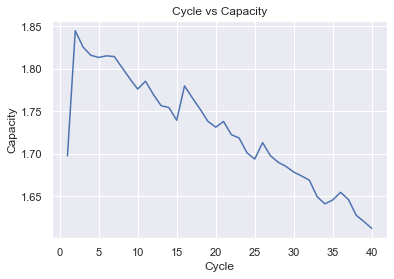

In [21]:
#Visualising the output feature with cycle column
plt.plot(df_discharge['Cycle'],df_discharge['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')

Text(0.5, 1.0, 'Time vs Voltage_Measured based on Different Cycles')

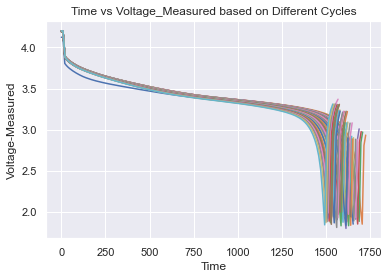

In [22]:
#Visualising Voltage and Time with Cycles
for i in range(1,len(df_discharge)+1):
    plot_df = df_discharge.loc[(df_discharge['Cycle']==i),['Time','Voltage_measured']]
    plt.plot(plot_df['Time'],plot_df['Voltage_measured'])
plt.xlabel('Time')
plt.ylabel('Voltage-Measured')
plt.title('Time vs Voltage_Measured based on Different Cycles')

<h5>Based on the above visualisation we can clearly see that battery voltage falls to 2V for b0029 battery and also we can see that battery reached till 4.2V </h5>

Text(2000, 4.2, 'Charge Cutoff Voltage')

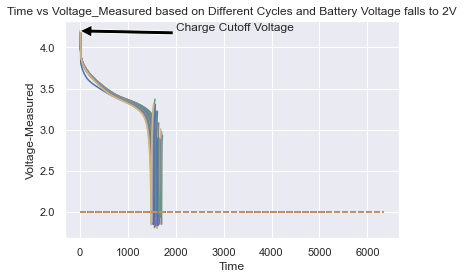

In [23]:
for i in range(1,len(df_discharge)+1):
    plot_df = df_discharge.loc[(df_discharge['Cycle']==i),['Time','Voltage_measured']]
    plt.plot(plot_df['Time'],plot_df['Voltage_measured'])
    plt.plot([1.,len(df_discharge)+1], [2.0, 2.0],linestyle='--')
plt.xlabel('Time')
plt.ylabel('Voltage-Measured')
plt.title('Time vs Voltage_Measured based on Different Cycles and Battery Voltage falls to 2V')
plt.annotate('Charge Cutoff Voltage',xy=(0,4.2),xytext=(2000,4.2),arrowprops={'facecolor':'black'})

Text(0.5, 1.0, 'Time vs Current_Measured based on Different Cycles')

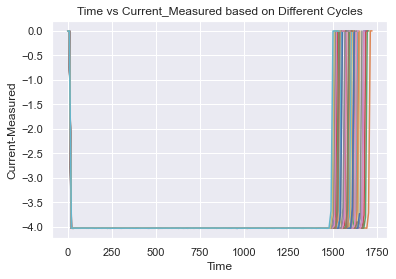

In [24]:
#Visualising the time and current measured with cycles
for i in range(1,len(df_discharge)+1):
    plot_df = df_discharge.loc[(df_discharge['Cycle']==i),['Time','Current_measured']]
    plt.plot(plot_df['Time'],plot_df['Current_measured'])
    #plt.plot([1.,len(df_discharge)+1], [2.0, 2.0])
plt.xlabel('Time')
plt.ylabel('Current-Measured')
plt.title('Time vs Current_Measured based on Different Cycles')

<h5>As the Capacity prediction cannot be done with given features</h5>
<h6>We are going for Indirect Health Indicators(IHI)</h6>
<p>1.When the battery temperature rises to the highest point, the time decreases with the increase of the number of cycles</p>
<p>2.The time needed to reach the lowest discharge point decreases with the increase of cycle numbers</p>

Text(0.5, 1.0, 'Time vs Temperature-Measured for different cycles')

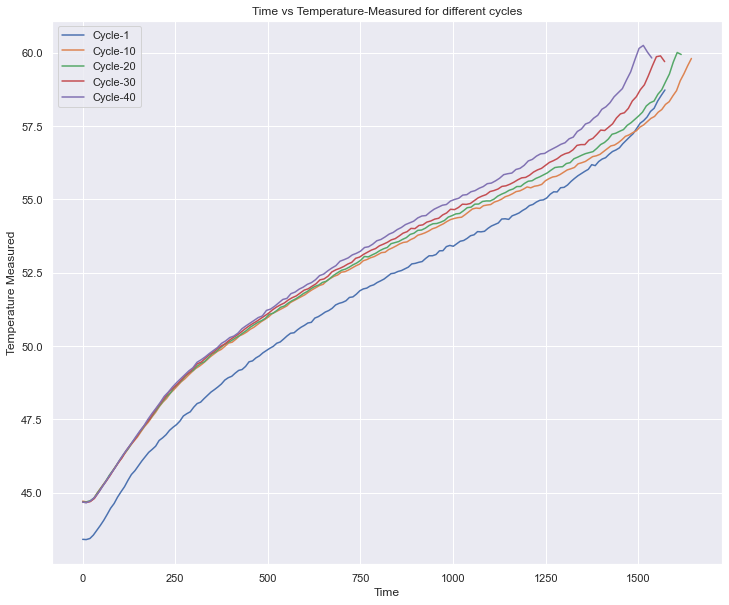

In [25]:
#When the battery temperature rises to the highest point, the time decreases with the increase of the number of cycles
plt.figure(figsize=(12,10))
plot_df = df_discharge.loc[(df_discharge['Cycle']==1),['Time','Temperature_measured']]
plt.plot(plot_df['Time'],plot_df['Temperature_measured'],label='Cycle-1')
plot_df = df_discharge.loc[(df_discharge['Cycle']==10),['Time','Temperature_measured']]
plt.plot(plot_df['Time'],plot_df['Temperature_measured'],label='Cycle-10')
plot_df = df_discharge.loc[(df_discharge['Cycle']==20),['Time','Temperature_measured']]
plt.plot(plot_df['Time'],plot_df['Temperature_measured'],label='Cycle-20')
plot_df = df_discharge.loc[(df_discharge['Cycle']==30),['Time','Temperature_measured']]
plt.plot(plot_df['Time'],plot_df['Temperature_measured'],label='Cycle-30')
plot_df = df_discharge.loc[(df_discharge['Cycle']==40),['Time','Temperature_measured']]
plt.plot(plot_df['Time'],plot_df['Temperature_measured'],label='Cycle-40')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature Measured')
plt.title('Time vs Temperature-Measured for different cycles')

Text(0.5, 1.0, 'Time vs Voltage-Measured for different cycles')

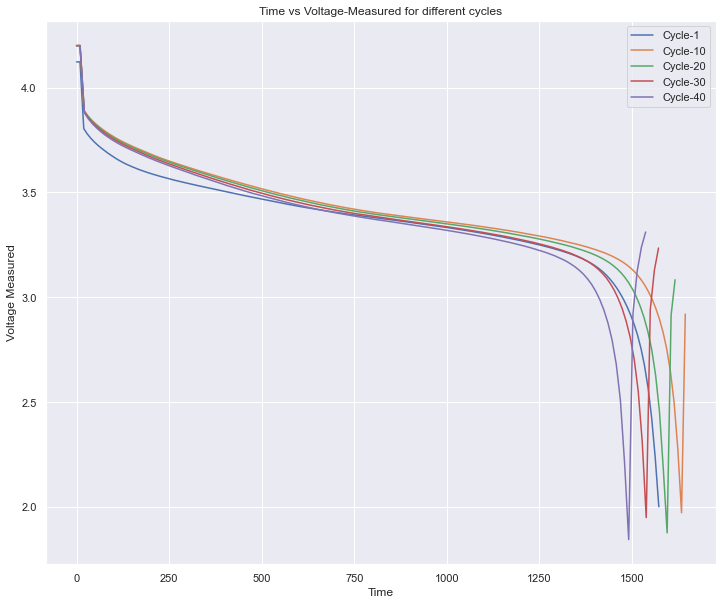

In [26]:
#The time needed to reach the lowest discharge point decreases with the increase of cycle numbers
plt.figure(figsize=(12,10))
plot_df = df_discharge.loc[(df_discharge['Cycle']==1),['Time','Voltage_measured']]
plt.plot(plot_df['Time'],plot_df['Voltage_measured'],label='Cycle-1')
plot_df = df_discharge.loc[(df_discharge['Cycle']==10),['Time','Voltage_measured']]
plt.plot(plot_df['Time'],plot_df['Voltage_measured'],label='Cycle-10')
plot_df = df_discharge.loc[(df_discharge['Cycle']==20),['Time','Voltage_measured']]
plt.plot(plot_df['Time'],plot_df['Voltage_measured'],label='Cycle-20')
plot_df = df_discharge.loc[(df_discharge['Cycle']==30),['Time','Voltage_measured']]
plt.plot(plot_df['Time'],plot_df['Voltage_measured'],label='Cycle-30')
plot_df = df_discharge.loc[(df_discharge['Cycle']==40),['Time','Voltage_measured']]
plt.plot(plot_df['Time'],plot_df['Voltage_measured'],label='Cycle-40')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Voltage Measured')
plt.title('Time vs Voltage-Measured for different cycles')

In [27]:
#Getting maximum temperature and time from discharge cycles
df_discharge_max=df_discharge.groupby('Cycle').max().set_index([np.arange(1,41,1)])
df_discharge_max

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time,Capacity
1,4.122759,-0.000321,58.726269,3.995,4.138,1572.359,43,"2009 04 07,16:31:01",1.697507
2,4.201346,0.001256,59.767964,3.995,4.217,1723.281,43,"2009 04 07,19:44:26",1.844701
3,4.200751,0.002369,59.844347,3.995,4.216,1705.906,43,"2009 04 07,22:58:18",1.825438
4,4.201219,0.001156,59.919947,3.995,4.217,1697.688,43,"2009 04 08,02:11:30",1.815750
5,4.201517,0.004025,59.894754,3.995,4.217,1686.094,43,"2009 04 08,05:23:26",1.813299
6,4.190432,0.001601,59.588132,3.995,4.206,1678.563,43,"2009 04 09,10:24:58",1.815165
7,4.201517,0.000928,59.813366,3.995,4.217,1677.469,43,"2009 04 09,13:33:59",1.814332
8,4.201512,0.003093,59.754335,3.995,4.217,1666.093,43,"2009 04 09,16:42:43",1.801344
9,4.201805,0.000062,59.773724,3.995,4.217,1654.328,43,"2009 04 09,19:50:50",1.788156
10,4.201439,0.002307,59.800107,3.995,4.217,1643.812,43,"2009 04 09,22:58:17",1.776071


In [28]:
#Creating a new column for cycle
cycle=np.arange(1,41,1)
Cycle=list(cycle)
df_discharge_max['Cycle']=Cycle
df_discharge_max

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time,Capacity,Cycle
1,4.122759,-0.000321,58.726269,3.995,4.138,1572.359,43,"2009 04 07,16:31:01",1.697507,1
2,4.201346,0.001256,59.767964,3.995,4.217,1723.281,43,"2009 04 07,19:44:26",1.844701,2
3,4.200751,0.002369,59.844347,3.995,4.216,1705.906,43,"2009 04 07,22:58:18",1.825438,3
4,4.201219,0.001156,59.919947,3.995,4.217,1697.688,43,"2009 04 08,02:11:30",1.815750,4
5,4.201517,0.004025,59.894754,3.995,4.217,1686.094,43,"2009 04 08,05:23:26",1.813299,5
6,4.190432,0.001601,59.588132,3.995,4.206,1678.563,43,"2009 04 09,10:24:58",1.815165,6
7,4.201517,0.000928,59.813366,3.995,4.217,1677.469,43,"2009 04 09,13:33:59",1.814332,7
8,4.201512,0.003093,59.754335,3.995,4.217,1666.093,43,"2009 04 09,16:42:43",1.801344,8
9,4.201805,0.000062,59.773724,3.995,4.217,1654.328,43,"2009 04 09,19:50:50",1.788156,9
10,4.201439,0.002307,59.800107,3.995,4.217,1643.812,43,"2009 04 09,22:58:17",1.776071,10


In [29]:
#Calculation of State of Health
#initial_capacity=df_discharge_max['Capacity'].max()
#for i in range(len(df_discharge_max)):
    #df_discharge_max['SOH %']=((df_discharge_max['Capacity']/initial_capacity)*100)
#df_discharge_max

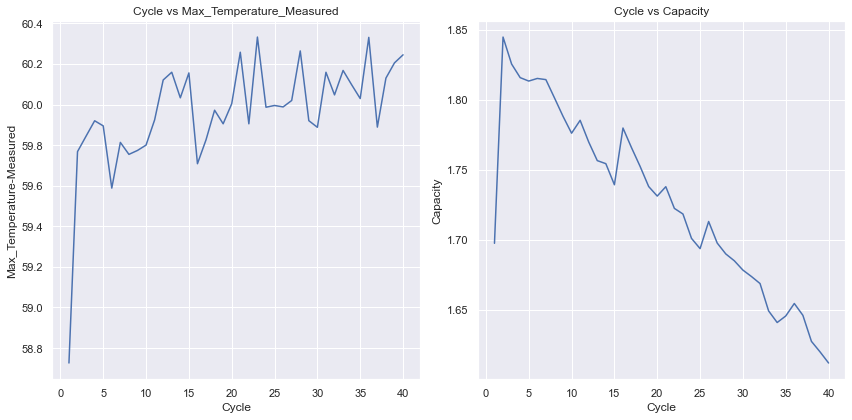

In [30]:
#Visualising cycle and temperature measured
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Temperature_measured'])
plt.xlabel('Cycle')
plt.ylabel('Max_Temperature-Measured')
plt.title('Cycle vs Max_Temperature_Measured')

plt.subplot(1,2,2)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')
plt.tight_layout()

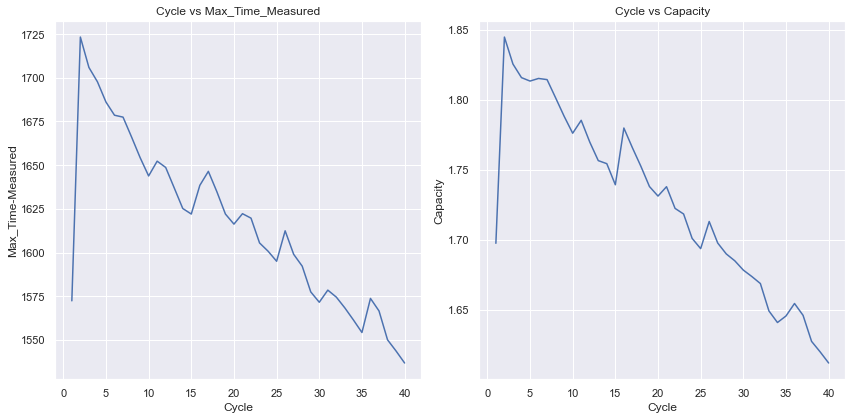

In [31]:
#Visualising cycle and time measured
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Time'])
plt.xlabel('Cycle')
plt.ylabel('Max_Time-Measured')
plt.title('Cycle vs Max_Time_Measured')

plt.subplot(1,2,2)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')
plt.tight_layout()

<p style=font-weight:bold;>Based on above two graphs Maximum Temperature measured and Maximum Time measured we can clearly see that maximum time and output capacity has strong relation whereas for maximum temperature and output does not seems to have very much strong relation.So it is clear that we can take Maximum Time as one of the input features for capacity prediction</p>

<h4>From the data description,Discharge cutoff voltage is 2V for battery b0029</h4>

In [32]:

df_discharge_voltage_fall=df_discharge[df_discharge['Voltage_measured']<2.0]
df_discharge_voltage_fall

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time,Capacity,Cycle
1,1.999936,-4.000556,58.726269,3.995,0.223,1572.359,43,"2009 04 07,16:31:01",1.69751,1
2,1.852059,-3.709875,59.602047,3.949,0.072,1703.531,43,"2009 04 07,19:44:26",1.8447,2
3,1.885726,-3.800134,59.653001,3.995,0.113,1686.219,43,"2009 04 07,22:58:18",1.82544,3
4,1.853478,-3.760799,59.643381,3.995,0.080,1677.891,43,"2009 04 08,02:11:30",1.81575,4
5,1.913444,-3.852364,59.681727,3.995,0.157,1666.172,43,"2009 04 08,05:23:26",1.8133,5
6,1.939237,-3.889456,59.588132,3.995,0.159,1678.563,43,"2009 04 09,10:24:58",1.81516,6
7,1.926680,-3.854774,59.584116,3.995,0.155,1667.406,43,"2009 04 09,13:33:59",1.81433,7
8,1.890708,-3.828557,59.544603,3.995,0.135,1655.921,43,"2009 04 09,16:42:43",1.80134,8
9,1.932492,-3.875494,59.579181,3.995,0.177,1644.250,43,"2009 04 09,19:50:50",1.78816,9
10,1.971367,-3.953283,59.551690,3.995,0.240,1633.703,43,"2009 04 09,22:58:17",1.77607,10


<h3>Data Visualisation for Charge Cycle</h3>

Text(0.5, 1.0, 'Time vs Current_Measured based on Different Cycles for Charging')

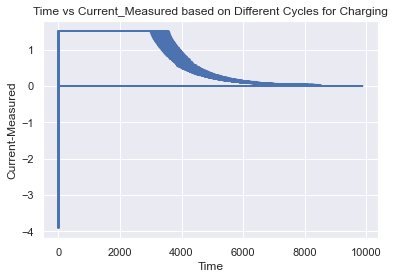

In [33]:
#Visualising Time and current measured for different cycles
plot_df = df_charge.loc[(df_charge['Cycle']>=1),['Time','Current_measured']]
plt.plot(plot_df['Time'],plot_df['Current_measured'])
#plt.plot([1.,len(df_discharge)+1], [2.0, 2.0])
plt.xlabel('Time')
plt.ylabel('Current-Measured')
plt.title('Time vs Current_Measured based on Different Cycles for Charging')

Text(0.5, 1.0, 'Time vs Voltage_Measured based on Different Cycles for Charging')

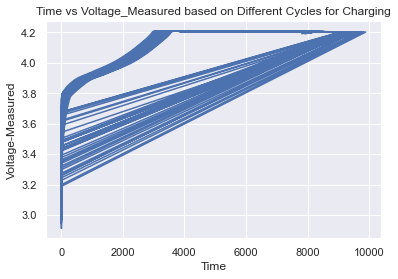

In [34]:
#Visualising time and voltage measured for different cycles
plot_df = df_charge.loc[(df_charge['Cycle']>=1),['Time','Voltage_measured']]
plt.plot(plot_df['Time'],plot_df['Voltage_measured'])
#plt.plot([1.,len(df_discharge)+1], [2.0, 2.0])
plt.xlabel('Time')
plt.ylabel('Voltage-Measured')
plt.title('Time vs Voltage_Measured based on Different Cycles for Charging')

<h4>Finding Maximum Charge Temperature from list of values in Temperature_measured and Time Vector of the Cycle in discharge columns</h4>

In [35]:
df_charge_max=df_charge.groupby('Cycle').max().set_index([np.arange(1,41,1)])
df_charge_max

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time
1,4.209610,1.517078,57.800366,1.5,4.931,9888.750,43,"2009 04 07,16:58:34"
2,4.209774,1.515127,58.120462,1.5,4.931,9764.735,43,"2009 04 07,20:14:29"
3,4.209721,1.515362,58.152838,1.5,4.931,9742.438,43,"2009 04 07,23:28:03"
4,4.208999,1.515733,58.197369,1.5,4.931,9674.140,43,"2009 04 08,02:41:07"
5,4.209535,1.515995,46.410924,1.5,4.942,9801.422,43,"2009 04 08,06:28:36"
6,4.208888,1.515536,58.658851,1.5,4.942,9517.672,43,"2009 04 09,10:54:17"
7,4.209625,1.515403,58.285001,1.5,4.937,9500.375,43,"2009 04 09,14:03:18"
8,4.209632,1.515216,58.332542,1.5,4.942,9474.375,43,"2009 04 09,17:11:50"
9,4.209709,1.517850,58.354300,1.5,4.942,9446.969,43,"2009 04 09,20:19:45"
10,4.209887,1.515923,46.444257,1.5,4.948,9648.516,43,"2009 04 10,00:02:46"


In [36]:
#Creating a new column named cycle
cycle=np.arange(1,41,1)
Cycle=list(cycle)
df_charge_max['Cycle']=Cycle
df_charge_max

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time,Cycle
1,4.209610,1.517078,57.800366,1.5,4.931,9888.750,43,"2009 04 07,16:58:34",1
2,4.209774,1.515127,58.120462,1.5,4.931,9764.735,43,"2009 04 07,20:14:29",2
3,4.209721,1.515362,58.152838,1.5,4.931,9742.438,43,"2009 04 07,23:28:03",3
4,4.208999,1.515733,58.197369,1.5,4.931,9674.140,43,"2009 04 08,02:41:07",4
5,4.209535,1.515995,46.410924,1.5,4.942,9801.422,43,"2009 04 08,06:28:36",5
6,4.208888,1.515536,58.658851,1.5,4.942,9517.672,43,"2009 04 09,10:54:17",6
7,4.209625,1.515403,58.285001,1.5,4.937,9500.375,43,"2009 04 09,14:03:18",7
8,4.209632,1.515216,58.332542,1.5,4.942,9474.375,43,"2009 04 09,17:11:50",8
9,4.209709,1.517850,58.354300,1.5,4.942,9446.969,43,"2009 04 09,20:19:45",9
10,4.209887,1.515923,46.444257,1.5,4.948,9648.516,43,"2009 04 10,00:02:46",10


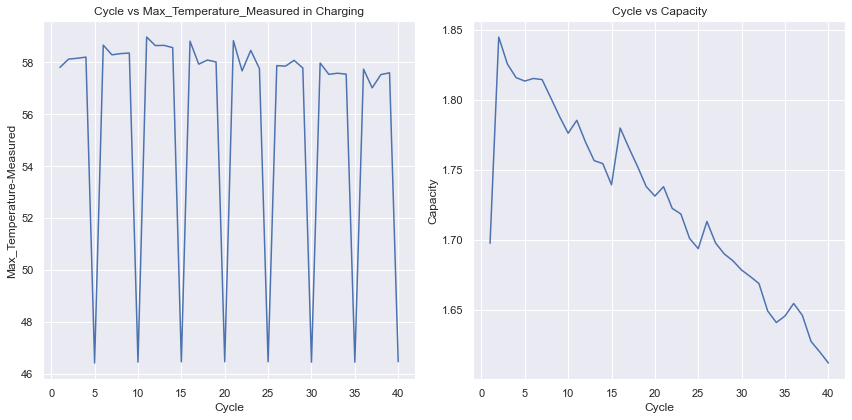

In [37]:
#Visualising Maximum Temperature measured with cycle
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df_charge_max['Cycle'],df_charge_max['Temperature_measured'])
plt.xlabel('Cycle')
plt.ylabel('Max_Temperature-Measured')
plt.title('Cycle vs Max_Temperature_Measured in Charging')

plt.subplot(1,2,2)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')
plt.tight_layout()

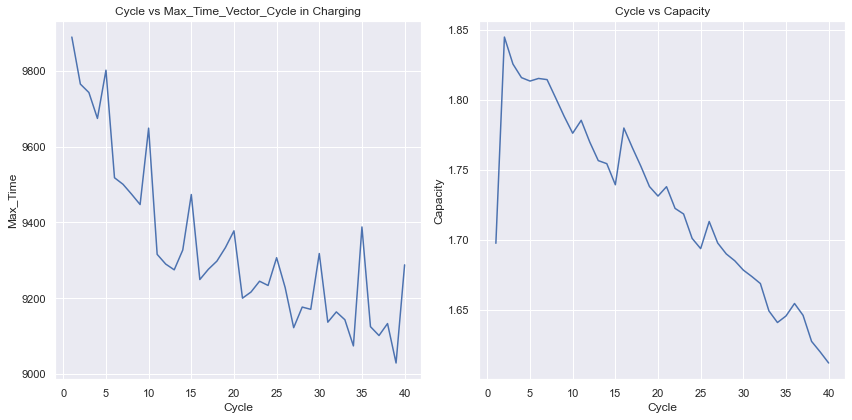

In [38]:
#Visualising Maximum Time and Cycle from charge cycles
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df_charge_max['Cycle'],df_charge_max['Time'])
plt.xlabel('Cycle')
plt.ylabel('Max_Time')
plt.title('Cycle vs Max_Time_Vector_Cycle in Charging')

plt.subplot(1,2,2)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')
plt.tight_layout()

<p style=font-weight:bold;>Based on above two graphs Maximum Temperature measured and Maximum Time measured for charge type we can see that maximum time and output capacity has some what good relation when compared with Maximum temperature measured.So we can also take Maximum Time from charge type as one of the input features for capacity prediction</p>

<h4>Charging was carried out in a constant current (CC) mode at 1.5A until the battery voltage reached 4.2V </h4>

In [39]:

df_charge_current_fall=df_charge[df_charge['Current_charge']==1.5]
df_charge_current_fall=df_charge_current_fall.groupby('Cycle').max()
df_charge_current_fall

#df_charge_current_fall=df_charge[df_charge['Current_charge']==1.5]
#df_charge_current_fall.groupby('Cycle').max()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time
Cycle,,,,,,,,
1,4.201223,1.517078,57.649507,1.5,4.931,3577.765,43,"2009 04 07,16:58:34"
2,4.203332,1.515029,57.945933,1.5,4.931,3546.672,43,"2009 04 07,20:14:29"
3,4.199441,1.515362,58.002112,1.5,4.931,3495.703,43,"2009 04 07,23:28:03"
4,4.200496,1.515733,58.058557,1.5,4.931,3477.828,43,"2009 04 08,02:41:07"
5,4.203340,1.514971,46.410924,1.5,4.942,3453.219,43,"2009 04 08,06:28:36"
6,4.203563,1.515536,58.378128,1.5,4.942,3529.094,43,"2009 04 09,10:54:17"
7,4.201667,1.515403,58.025365,1.5,4.937,3460.625,43,"2009 04 09,14:03:18"
8,4.202183,1.514966,58.016740,1.5,4.942,3431.563,43,"2009 04 09,17:11:50"
9,4.200544,1.517850,58.088806,1.5,4.942,3394.313,43,"2009 04 09,20:19:45"


In [40]:
#And then continued in a constant voltage (CV) mode until the charge current dropped to 20mA.
x1=df_charge[df_charge['Current_charge']<0.02]
x1.groupby('Cycle').max()

,Voltage_measured,Current_measured,Temperature_measured,Current_charge,Voltage_charge,Time,ambient_temperature,time
Cycle,,,,,,,,
1,4.206239,0.012625,57.800366,0.012,4.229,9888.750,43,"2009 04 07,16:58:34"
2,4.205677,0.016480,58.120462,0.013,4.229,9764.735,43,"2009 04 07,20:14:29"
3,4.206048,0.014532,58.152838,0.013,4.229,9742.438,43,"2009 04 07,23:28:03"
4,4.206068,0.014826,58.197369,0.013,4.229,9674.140,43,"2009 04 08,02:41:07"
5,4.206092,0.014453,44.812149,0.012,4.229,9801.422,43,"2009 04 08,06:28:36"
6,4.206071,0.012780,58.658851,0.012,4.229,9517.672,43,"2009 04 09,10:54:17"
7,4.206139,0.016088,58.285001,0.013,4.229,9500.375,43,"2009 04 09,14:03:18"
8,4.206211,0.015224,58.332542,0.012,4.229,9474.375,43,"2009 04 09,17:11:50"
9,4.205934,0.012846,58.354300,0.012,4.229,9446.969,43,"2009 04 09,20:19:45"


<h2>Feature Selection</h2>

<h3>Selecting correct input features from charging and discharging based on above visualisation without adding two important features</h3>

In [41]:
b0029=df_discharge_max[['Cycle','ambient_temperature']]
b0029['Discharge_Max_Temperature']=df_discharge_max['Temperature_measured']
b0029['Discharge_Max_Time']=df_discharge_max['Time']
b0029['Charge_Max_Temperature']=df_charge_max['Temperature_measured']
b0029['Charge_Max_Time']=df_charge_max['Time']
b0029['Discharge_Voltage_Drop']=2.0
b0029['Discharge_Current']=4
b0029['Capacity']=df_discharge_max['Capacity']
#b0029['SOH %']=df_discharge_max['SOH %']
b0029

,Cycle,ambient_temperature,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity
1,1,43,58.726269,1572.359,57.800366,9888.750,2.0,4,1.697507
2,2,43,59.767964,1723.281,58.120462,9764.735,2.0,4,1.844701
3,3,43,59.844347,1705.906,58.152838,9742.438,2.0,4,1.825438
4,4,43,59.919947,1697.688,58.197369,9674.140,2.0,4,1.815750
5,5,43,59.894754,1686.094,46.410924,9801.422,2.0,4,1.813299
6,6,43,59.588132,1678.563,58.658851,9517.672,2.0,4,1.815165
7,7,43,59.813366,1677.469,58.285001,9500.375,2.0,4,1.814332
8,8,43,59.754335,1666.093,58.332542,9474.375,2.0,4,1.801344
9,9,43,59.773724,1654.328,58.354300,9446.969,2.0,4,1.788156
10,10,43,59.800107,1643.812,46.444257,9648.516,2.0,4,1.776071


In [42]:
b0029.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle                      40 non-null     int64  
 1   ambient_temperature        40 non-null     object 
 2   Discharge_Max_Temperature  40 non-null     float64
 3   Discharge_Max_Time         40 non-null     float64
 4   Charge_Max_Temperature     40 non-null     float64
 5   Charge_Max_Time            40 non-null     float64
 6   Discharge_Voltage_Drop     40 non-null     float64
 7   Discharge_Current          40 non-null     int64  
 8   Capacity                   40 non-null     float64
dtypes: float64(6), int64(2), object(1)
memory usage: 3.1+ KB


In [43]:
b0029.describe()

,Cycle,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.0,40.0,40.000000
mean,20.500000,59.963738,1616.299525,55.747147,9336.832875,2.0,4.0,1.726012
std,11.690452,0.267940,47.432415,4.727724,214.371924,0.0,0.0,0.064053
min,1.000000,58.726269,1536.781000,46.410924,9029.031000,2.0,4.0,1.612080
25%,10.750000,59.876856,1574.285250,57.530848,9175.078500,2.0,4.0,1.677241
50%,20.500000,59.987457,1617.953000,57.859684,9288.977000,2.0,4.0,1.726824
75%,30.250000,60.136506,1646.996500,58.296886,9453.586000,2.0,4.0,1.777000
max,40.000000,60.332434,1723.281000,58.969705,9888.750000,2.0,4.0,1.844701


In [44]:
b0029.corr()

,Cycle,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity
Cycle,1.000000,0.588403,-0.888107,-0.135997,-0.829073,NaN,NaN,-0.929959
Discharge_Max_Temperature,0.588403,1.000000,-0.287672,-0.073382,-0.646251,NaN,NaN,-0.368107
Discharge_Max_Time,-0.888107,-0.287672,1.000000,0.187244,0.666783,NaN,NaN,0.983280
Charge_Max_Temperature,-0.135997,-0.073382,0.187244,1.000000,-0.241762,NaN,NaN,0.171538
Charge_Max_Time,-0.829073,-0.646251,0.666783,-0.241762,1.000000,NaN,NaN,0.686518
Discharge_Voltage_Drop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discharge_Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity,-0.929959,-0.368107,0.983280,0.171538,0.686518,NaN,NaN,1.000000


<AxesSubplot:>

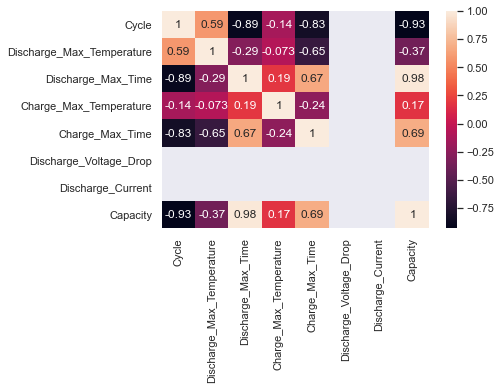

In [45]:
sns.heatmap(b0029.corr(),annot=True)

<h3>Capacity Prediction</h3>

In [46]:
b0029.columns

Index(['Cycle', 'ambient_temperature', 'Discharge_Max_Temperature',
       'Discharge_Max_Time', 'Charge_Max_Temperature', 'Charge_Max_Time',
       'Discharge_Voltage_Drop', 'Discharge_Current', 'Capacity'],
      dtype='object')

<h5>Selecting important columns for the input features,like time and temperature for prediction of capacity from charge and discharge cycles</h5>

In [47]:
X=b0029[['Cycle', 'Discharge_Max_Temperature',
       'Discharge_Max_Time','Charge_Max_Temperature', 'Charge_Max_Time' ]].values
y=b0029['Capacity'].values

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=34)

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 5)
(10, 5)
(30,)
(10,)


In [50]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler(feature_range=(0,1))
X_train=m.fit_transform(X_train)
X_test=m.transform(X_test)

<h2>1. Linear Regression</h2>

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
y_pred_test=lr.predict(X_test)
print(y_pred_test.shape)

y_pred_train=lr.predict(X_train)
print(y_pred_train.shape)

(10,)
(30,)


In [53]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_pred_train,y_train))
print('R2-Score for Test Data:',r2_score(y_pred_test,y_test))
print('Root Mean-Squared Error:',np.sqrt(mean_squared_error(y_pred_test,y_test)))

R2-Score for Train Data: 0.9888286713775741
R2-Score for Test Data: 0.9837345132871278
Root Mean-Squared Error: 0.009411185809670132


In [54]:
print("Capacity predict=======Actual value======difference")
for i in range(len(y_pred_test)):
    print(str(y_pred_test[i])+"     "+ str(y_test[i]) +"    "+str(float(y_test[i]-y_pred_test[i])))

Capacity predict=======Actual value======difference
1.6325523826659654     1.645636022975709    0.013083640309743627
1.6714504890286137     1.6737947494868322    0.00234426045821845
1.8584904038129313     1.8447012069611741    -0.013789196851757168
1.764485415065856     1.756523168052175    -0.00796224701368109
1.8302078767400927     1.815750429913437    -0.014457446826655618
1.6895032312362404     1.6899314034061201    0.00042817216987978135
1.7994092550691603     1.801343601809866    0.0019343467407058057
1.769633854239736     1.776071460453951    0.006437606214214853
1.7037869253650535     1.6976972688567131    -0.006089656508340369
1.8382446252547822     1.825437667472292    -0.01280695778249008


Text(0.5, 1.0, 'Predicted vs Original Capacity')

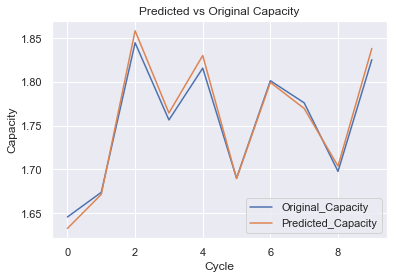

In [55]:
#Visualising Original and Predicted Capacity
plt.plot(y_test,label='Original_Capacity')
plt.plot(y_pred_test,label='Predicted_Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.title('Predicted vs Original Capacity')

<h2>2. Ridge Regression</h2>

In [56]:

from sklearn.linear_model import Ridge
rdg=Ridge(alpha=0.02)
rdg.fit(X_train,y_train)

Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [57]:
y_pred_test1=rdg.predict(X_test)
print(y_pred_test1.shape)

y_pred_train1=rdg.predict(X_train)
print(y_pred_train1.shape)

(10,)
(30,)


In [58]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_pred_train1,y_train))
print('R2-Score for Test Data:',r2_score(y_pred_test1,y_test))
print('Root Mean-Squared Error',np.sqrt(mean_squared_error(y_pred_test1,y_test)))

R2-Score for Train Data: 0.9885043233378786
R2-Score for Test Data: 0.9824886258648297
Root Mean-Squared Error 0.00979174718821971


In [59]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_pred_test)):
    print(str(y_pred_test1[i])+"     "+ str(y_test[i]) +"    "+str(float(y_test[i]-y_pred_test1[i])))

Capacity_predict=======Actual value======difference
1.6336899003696324     1.645636022975709    0.011946122606076637
1.671844293682096     1.6737947494868322    0.0019504558047360732
1.859660571746711     1.8447012069611741    -0.014959364785536833
1.7642563720994895     1.756523168052175    -0.00773320404731459
1.8314973262514391     1.815750429913437    -0.01574689633800208
1.6901828228349256     1.6899314034061201    -0.0002514194288054661
1.7991116638485822     1.801343601809866    0.0022319379612838475
1.769621439948237     1.776071460453951    0.00645002050571386
1.7030495823080931     1.6976972688567131    -0.005352313451379986
1.8397703029700763     1.825437667472292    -0.014332635497784185


Text(0.5, 1.0, 'Predicted vs Original Capacity')

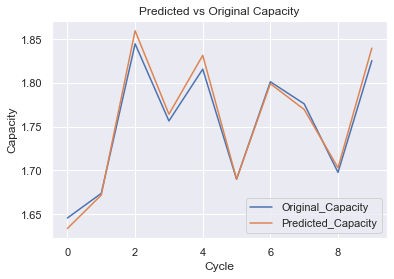

In [60]:
#Visualising Original and Predicted Capacity
plt.plot(y_test,label='Original_Capacity')
plt.plot(y_pred_test1,label='Predicted_Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.title('Predicted vs Original Capacity')

<h2>3. Polynomial Regression</h2>

In [61]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures()
X_train=pf.fit_transform(X_train)
X_test=pf.transform(X_test)

In [62]:
polylinear=LinearRegression()
polylinear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
y_pred_test2=polylinear.predict(X_test)
print(y_pred_test2.shape)

y_pred_train2=polylinear.predict(X_train)
print(y_pred_train2.shape)

(10,)
(30,)


In [64]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_pred_train2,y_train))
print('R2-Score for Test Data:',r2_score(y_pred_test2,y_test))
print('Root Mean-Squared Error',np.sqrt(mean_squared_error(y_pred_test2,y_test)))

R2-Score for Train Data: 0.9989303939565489
R2-Score for Test Data: 0.6298834687728097
Root Mean-Squared Error 0.03412643130190304


In [65]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_test)):
    print(str(y_pred_test2[i])+"     "+ str(y_test[i]) +"    "+str(float(y_test[i]-y_pred_test2[i])))

Capacity_predict=======Actual value======difference
1.6226955183842684     1.645636022975709    0.02294050459144059
1.669850273320808     1.6737947494868322    0.0039444761660241134
1.772482996000697     1.8447012069611741    0.0722182109604772
1.7485914582852766     1.756523168052175    0.007931709766898276
1.793824115069954     1.815750429913437    0.021926314843482952
1.6884902429039     1.6899314034061201    0.0014411605022202068
1.7996951820808147     1.801343601809866    0.001648419729051387
1.7588349381237776     1.776071460453951    0.017236522330173365
1.6847789392573467     1.6976972688567131    0.012918329599366452
1.7556065352943424     1.825437667472292    0.06983113217794967


Text(0.5, 1.0, 'Predicted vs Original Capacity')

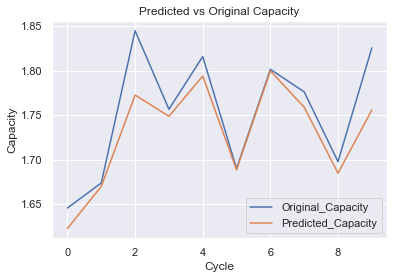

In [66]:
plt.plot(y_test,label='Original_Capacity')
plt.plot(y_pred_test2,label='Predicted_Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.title('Predicted vs Original Capacity')

<h3>Adding Extra Input Features based on description of dataset</h3>
<p>Discharge was carried out at 4A until the battery voltage fell to 2.0V for battery 29</p>
<p>Charging was carried out in a constant current (CC) mode at 1.5A until the battery voltage reached 4.2V and then continued in a constant voltage (CV) mode until the charge current dropped to 20mA</p>

In [67]:
b0029['Charging_Max_Threshold_Voltage_time']=df_charge_current_fall['Time']
b0029['Discharging_Min_Threshold_Voltage_time']=df_discharge_voltage_fall['Time']
b0029

,Cycle,ambient_temperature,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity,Charging_Max_Threshold_Voltage_time,Discharging_Min_Threshold_Voltage_time
1,1,43,58.726269,1572.359,57.800366,9888.750,2.0,4,1.697507,3577.765,1572.359
2,2,43,59.767964,1723.281,58.120462,9764.735,2.0,4,1.844701,3546.672,1703.531
3,3,43,59.844347,1705.906,58.152838,9742.438,2.0,4,1.825438,3495.703,1686.219
4,4,43,59.919947,1697.688,58.197369,9674.140,2.0,4,1.815750,3477.828,1677.891
5,5,43,59.894754,1686.094,46.410924,9801.422,2.0,4,1.813299,3453.219,1666.172
6,6,43,59.588132,1678.563,58.658851,9517.672,2.0,4,1.815165,3529.094,1678.563
7,7,43,59.813366,1677.469,58.285001,9500.375,2.0,4,1.814332,3460.625,1667.406
8,8,43,59.754335,1666.093,58.332542,9474.375,2.0,4,1.801344,3431.563,1655.921
9,9,43,59.773724,1654.328,58.354300,9446.969,2.0,4,1.788156,3394.313,1644.250
10,10,43,59.800107,1643.812,46.444257,9648.516,2.0,4,1.776071,3363.703,1633.703


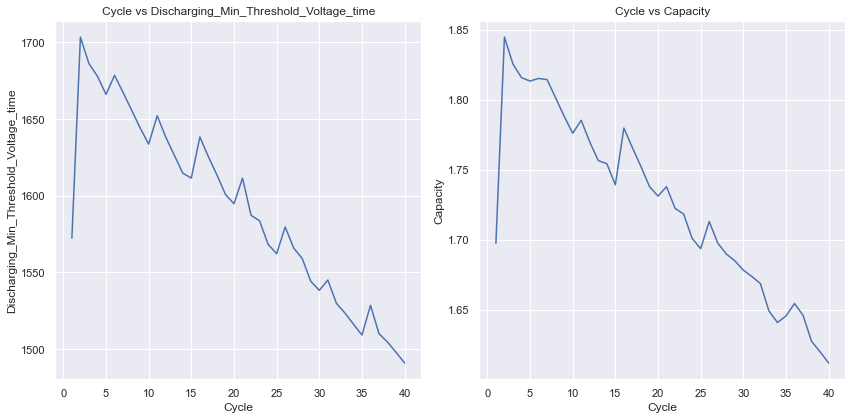

In [68]:
#Visualising Discharging_Min_Threshold_Voltage_time measured with cycle and comparing with output
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(b0029['Cycle'],b0029['Discharging_Min_Threshold_Voltage_time'])
plt.xlabel('Cycle')
plt.ylabel('Discharging_Min_Threshold_Voltage_time')
plt.title('Cycle vs Discharging_Min_Threshold_Voltage_time')

plt.subplot(1,2,2)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')
plt.tight_layout()

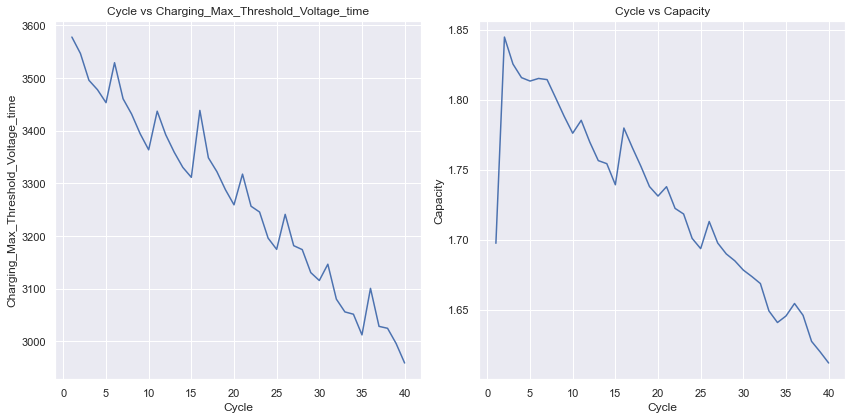

In [69]:
#Visualising Charging_Max_Threshold_Voltage_time measured with cycle and comparing with output
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(b0029['Cycle'],b0029['Charging_Max_Threshold_Voltage_time'])
plt.xlabel('Cycle')
plt.ylabel('Charging_Max_Threshold_Voltage_time')
plt.title('Cycle vs Charging_Max_Threshold_Voltage_time')

plt.subplot(1,2,2)
plt.plot(df_discharge_max['Cycle'],df_discharge_max['Capacity'])
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.title('Cycle vs Capacity')
plt.tight_layout()

<p style=font-weight:bold;>Based on above two graphs Discharging_Min_Threshold_Voltage_time and Charging_Max_Threshold_Voltage_time for both charge and discharge type we can see that both has good relation with output for capacity prediction.So we can take these two features for capacity prediction to get performance result much better so we are adding these two input features</p>

In [70]:
b0029.corr()

,Cycle,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity,Charging_Max_Threshold_Voltage_time,Discharging_Min_Threshold_Voltage_time
Cycle,1.000000,0.588403,-0.888107,-0.135997,-0.829073,NaN,NaN,-0.929959,-0.980309,-0.936519
Discharge_Max_Temperature,0.588403,1.000000,-0.287672,-0.073382,-0.646251,NaN,NaN,-0.368107,-0.600033,-0.357607
Discharge_Max_Time,-0.888107,-0.287672,1.000000,0.187244,0.666783,NaN,NaN,0.983280,0.878858,0.982604
Charge_Max_Temperature,-0.135997,-0.073382,0.187244,1.000000,-0.241762,NaN,NaN,0.171538,0.233392,0.189156
Charge_Max_Time,-0.829073,-0.646251,0.666783,-0.241762,1.000000,NaN,NaN,0.686518,0.766730,0.685690
Discharge_Voltage_Drop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Discharge_Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Capacity,-0.929959,-0.368107,0.983280,0.171538,0.686518,NaN,NaN,1.000000,0.925206,0.996379
Charging_Max_Threshold_Voltage_time,-0.980309,-0.600033,0.878858,0.233392,0.766730,NaN,NaN,0.925206,1.000000,0.936237
Discharging_Min_Threshold_Voltage_time,-0.936519,-0.357607,0.982604,0.189156,0.685690,NaN,NaN,0.996379,0.936237,1.000000


<AxesSubplot:>

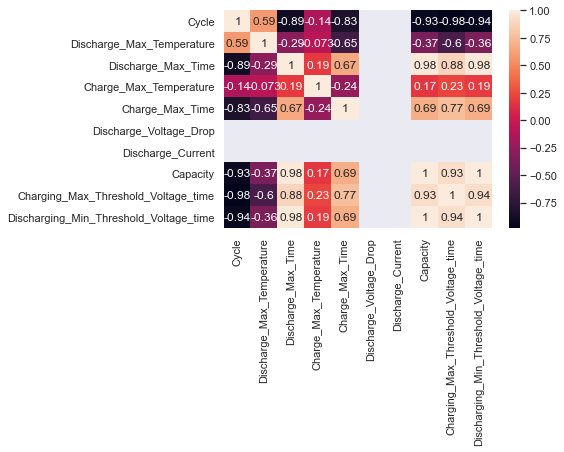

In [71]:
sns.heatmap(b0029.corr(),annot=True)

In [72]:
X=b0029[['Cycle', 'Discharge_Max_Temperature',
       'Discharge_Max_Time', 'Charge_Max_Temperature', 'Charge_Max_Time', 
       'Charging_Max_Threshold_Voltage_time',
       'Discharging_Min_Threshold_Voltage_time']]
y=b0029['Capacity']

In [73]:
b0029.columns

Index(['Cycle', 'ambient_temperature', 'Discharge_Max_Temperature',
       'Discharge_Max_Time', 'Charge_Max_Temperature', 'Charge_Max_Time',
       'Discharge_Voltage_Drop', 'Discharge_Current', 'Capacity',
       'Charging_Max_Threshold_Voltage_time',
       'Discharging_Min_Threshold_Voltage_time'],
      dtype='object')

<h3> Feature Selection - Selecting important features to get better performance for capacity prediction </h3>

In [74]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cycle                                   40 non-null     int64  
 1   Discharge_Max_Temperature               40 non-null     float64
 2   Discharge_Max_Time                      40 non-null     float64
 3   Charge_Max_Temperature                  40 non-null     float64
 4   Charge_Max_Time                         40 non-null     float64
 5   Charging_Max_Threshold_Voltage_time     40 non-null     float64
 6   Discharging_Min_Threshold_Voltage_time  40 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 2.5 KB


<p style=font-weight:bold;>Mutual information between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.</p>

In [75]:
from sklearn.feature_selection import mutual_info_regression
mutal_info=mutual_info_regression(X,y)
mutal_info

array([1.54236098, 0.32296935, 1.6819359 , 0.0478779 , 0.72361591,
       1.66233707, 1.98913828])

In [76]:
mutal_info=pd.Series(mutal_info)
mutal_info.index=X.columns
mutal_info.sort_values(ascending=False)

Discharging_Min_Threshold_Voltage_time    1.989138
Discharge_Max_Time                        1.681936
Charging_Max_Threshold_Voltage_time       1.662337
Cycle                                     1.542361
Charge_Max_Time                           0.723616
Discharge_Max_Temperature                 0.322969
Charge_Max_Temperature                    0.047878
dtype: float64

<AxesSubplot:>

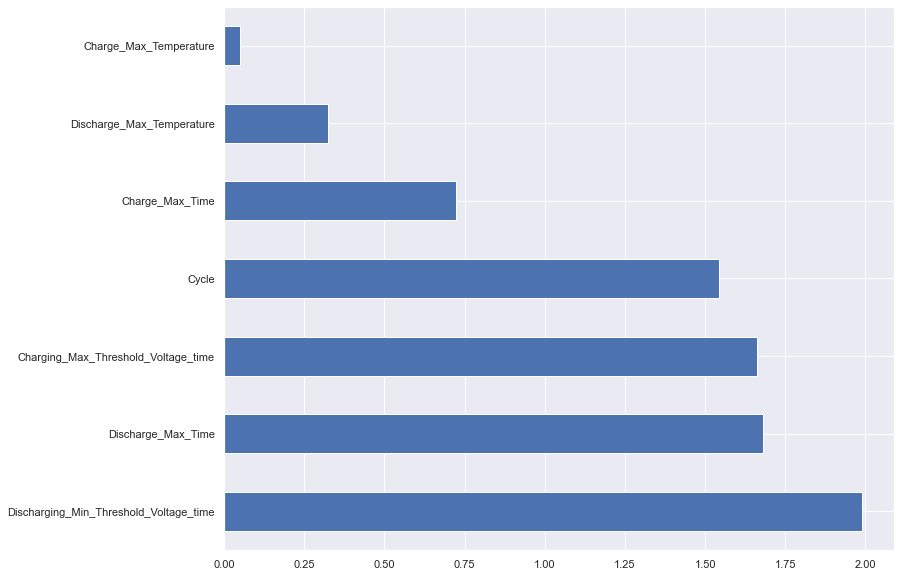

In [77]:
mutal_info.sort_values(ascending=False).plot.barh(figsize=(12,10))

<h4>Based on mutual information regression,correlation and above visualised features with output capacity we are taking higher dependency input features.</h4>
<h4>And also we are seeing for newly added input features(Discharging_Min_Threshold_Voltage_time,Charging_Max_Threshold_Voltage_time) increases the r2 score and reduces the error when compared with previous</h4>

In [78]:
a=b0029[['Charge_Max_Time','Discharge_Max_Time','Charging_Max_Threshold_Voltage_time','Discharging_Min_Threshold_Voltage_time']].values
b=b0029['Capacity'].values

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.25, random_state=34)

In [80]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30, 4)
(10, 4)
(30,)
(10,)


In [81]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
X_train=mm.fit_transform(X_train)
X_test=mm.transform(X_test)

In [82]:
import pickle as pkl
pkl.dump(mm,open('capacity_prediction_min_max_scaler.pkl','wb'))

<h2>1. Linear Regression</h2>

In [83]:
from sklearn.linear_model import LinearRegression
opt_lr=LinearRegression()
opt_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred_test_opt=opt_lr.predict(X_test)
print(y_pred_test_opt.shape)

y_pred_train_opt=opt_lr.predict(X_train)
print(y_pred_train_opt.shape)

(10,)
(30,)


In [85]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_pred_train_opt,y_train))
print('R2-Score for Test Data',r2_score(y_pred_test_opt,y_test))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_pred_test_opt,y_test)))

R2-Score for Train Data: 0.9929490910292362
R2-Score for Test Data 0.9890884180025823
Root Mean Squared Error 0.0075355434540563425


In [86]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_test)):
    print(str(y_pred_test_opt[i])+"     "+ str(y_test[i]) +"    "+str(float(y_test[i]-y_pred_test_opt[i])))

Capacity_predict=======Actual value======difference
1.638327672211828     1.645636022975709    0.007308350763880922
1.6747091913841592     1.6737947494868322    -0.0009144418973270341
1.857713763297673     1.8447012069611741    -0.013012556336498893
1.7623181445947533     1.756523168052175    -0.005794976542578434
1.82741980102666     1.815750429913437    -0.01166937111322297
1.6911568701374868     1.6899314034061201    -0.0012254667313666978
1.7974662248051942     1.801343601809866    0.0038773770046718337
1.7725043835029373     1.776071460453951    0.003567076951013659
1.6988083222594423     1.6976972688567131    -0.0011110534027292118
1.8374384616171093     1.825437667472292    -0.01200079414481725


Text(0.5, 1.0, 'Predicted vs Original Capacity')

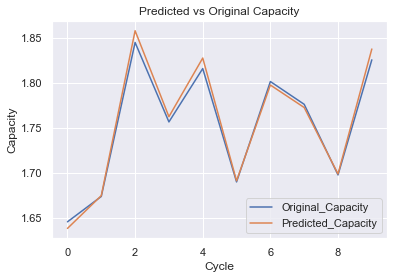

In [87]:
plt.plot(y_test,label='Original_Capacity')
plt.plot(y_pred_test_opt,label='Predicted_Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.title('Predicted vs Original Capacity')

<h2>2. Ridge Regression</h2>

In [88]:

from sklearn.linear_model import Ridge
opt_rdg=Ridge(alpha=0.02)
opt_rdg.fit(X_train,y_train)

Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [89]:
y_pred_test1_opt=opt_rdg.predict(X_test)
print(y_pred_test1_opt.shape)

y_pred_train1_opt=opt_rdg.predict(X_train)
print(y_pred_train1_opt.shape)

(10,)
(30,)


In [90]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_pred_train1_opt,y_train))
print('R2-Score for Test Data',r2_score(y_pred_test1_opt,y_test))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_pred_test1_opt,y_test)))

R2-Score for Train Data: 0.9924851726176667
R2-Score for Test Data 0.9858648778162964
Root Mean Squared Error 0.008658388040313705


In [91]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_test)):
    print(str(y_pred_test1_opt[i])+"     "+ str(y_test[i]) +"    "+str(float(y_test[i]-y_pred_test1_opt[i])))

Capacity_predict=======Actual value======difference
1.6369445679105539     1.645636022975709    0.008691455065155118
1.674931328489126     1.6737947494868322    -0.0011365790022939137
1.8600775446559448     1.8447012069611741    -0.015376337694770648
1.761553278399857     1.756523168052175    -0.005030110347682193
1.8288764048020427     1.815750429913437    -0.013125974888605674
1.6915749391980603     1.6899314034061201    -0.0016435357919402094
1.797163658374109     1.801343601809866    0.004179943435757005
1.7702094400045087     1.776071460453951    0.0058620204494421735
1.6994567347430567     1.6976972688567131    -0.0017594658863435697
1.8388982210574243     1.825437667472292    -0.013460553585132207


Text(0.5, 1.0, 'Predicted vs Original Capacity')

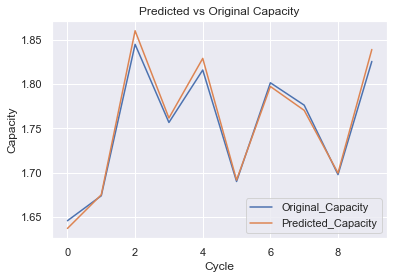

In [92]:
plt.plot(y_test,label='Original_Capacity')
plt.plot(y_pred_test1_opt,label='Predicted_Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.title('Predicted vs Original Capacity')

<h2>3. Polynomial Regression</h2>

In [93]:
from sklearn.preprocessing import PolynomialFeatures
pfr=PolynomialFeatures()
X_train=pfr.fit_transform(X_train)
X_test=pfr.transform(X_test)

In [94]:
pol=LinearRegression()
pol.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
y_pred_test2_opt=pol.predict(X_test)
print(y_pred_test2_opt.shape)

y_pred_train2_opt=pol.predict(X_train)
print(y_pred_train2_opt.shape)

(10,)
(30,)


In [96]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_pred_train2_opt,y_train))
print('R2-Score for Test Data:',r2_score(y_pred_test2_opt,y_test))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_pred_test2_opt,y_test)))

R2-Score for Train Data: 0.9970148964691468
R2-Score for Test Data: 0.8453312878101062
Root Mean Squared Error 0.03737203259358782


In [97]:
print("Capacity_predict=======Actual value======difference")
for i in range(len(y_test)):
    print(str(y_pred_test2_opt[i])+"     "+ str(y_test[i]) +"    "+str(float(y_test[i]-y_pred_test2_opt[i])))

Capacity_predict=======Actual value======difference
1.626810349886228     1.645636022975709    0.01882567308948091
1.6748396532121568     1.6737947494868322    -0.0010449037253246196
1.9278689010984045     1.8447012069611741    -0.08316769413723035
1.7582276043147909     1.756523168052175    -0.0017044362626159604
1.8668841809468497     1.815750429913437    -0.05113375103341267
1.690131150519819     1.6899314034061201    -0.00019974711369896703
1.798988054790248     1.801343601809866    0.002355547019618154
1.747736250140004     1.776071460453951    0.028335210313946924
1.6920330265157952     1.6976972688567131    0.005664242340917891
1.8823253039091061     1.825437667472292    -0.05688763643681405


Text(0.5, 1.0, 'Predicted vs Original Capacity')

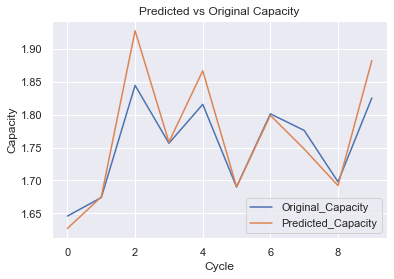

In [98]:
plt.plot(y_test,label='Original_Capacity')
plt.plot(y_pred_test2_opt,label='Predicted_Capacity')
plt.xlabel('Cycle')
plt.ylabel('Capacity')
plt.legend()
plt.title('Predicted vs Original Capacity')

<h3>Predicting new result</h3>

In [99]:
new_result=opt_lr.predict(mm.transform([[9888.750,1572.359,3577.765,1572.359]]))
new_result1=opt_rdg.predict(mm.transform([[9888.750,1572.359,3577.765,1572.359]]))
print('Linear Regression new prediction:',new_result)
print('Ridge Regression new prediction',new_result1)
new_result2=opt_lr.predict(mm.transform([[8750.123,988.123,2200.564,921.432]]))
new_result2


Linear Regression new prediction: [1.69793434]
Ridge Regression new prediction [1.70055105]


array([0.95654094])

<h3>Inference for Capacity Prediction</h3>
<p>For Capacity prediction,we cannot able to predict capacity directly.So we are going for Indirect Health Indicators(IHI) for charge,current,and temperature curves as input features and finaly we are selecting best input features in that for our data and we taking only the importatnt features which has a strong relationship with output capacity prediction.After that we training machine learning model for three different algorithms and finally we are checking for good r2 score and lowest root mean squared error and we are selecting the suitable model for our data based on the three different algorithms we are choosing Linear Regression for our data because it show good r2 score and lower root mean squared error when compared to other algorithms</p>

<h3>Saving the model</h3>

In [100]:
import pickle as pkl
pkl.dump(opt_lr,open('capacity_prediction.pkl','wb'))

<h2>Batter Cycle Prediction</h2>

<h4>Copying the dataframe for future refernce</h4>

In [101]:
cycle_data=b0029.copy()
cycle_data

,Cycle,ambient_temperature,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity,Charging_Max_Threshold_Voltage_time,Discharging_Min_Threshold_Voltage_time
1,1,43,58.726269,1572.359,57.800366,9888.750,2.0,4,1.697507,3577.765,1572.359
2,2,43,59.767964,1723.281,58.120462,9764.735,2.0,4,1.844701,3546.672,1703.531
3,3,43,59.844347,1705.906,58.152838,9742.438,2.0,4,1.825438,3495.703,1686.219
4,4,43,59.919947,1697.688,58.197369,9674.140,2.0,4,1.815750,3477.828,1677.891
5,5,43,59.894754,1686.094,46.410924,9801.422,2.0,4,1.813299,3453.219,1666.172
6,6,43,59.588132,1678.563,58.658851,9517.672,2.0,4,1.815165,3529.094,1678.563
7,7,43,59.813366,1677.469,58.285001,9500.375,2.0,4,1.814332,3460.625,1667.406
8,8,43,59.754335,1666.093,58.332542,9474.375,2.0,4,1.801344,3431.563,1655.921
9,9,43,59.773724,1654.328,58.354300,9446.969,2.0,4,1.788156,3394.313,1644.250
10,10,43,59.800107,1643.812,46.444257,9648.516,2.0,4,1.776071,3363.703,1633.703


In [102]:
n=len(cycle_data)+1
print(n)
li=[]
for i in range(1,n):
    x=(n-1)-cycle_data.loc[i]['Cycle']
    li.append(x)
print(li)

41
[39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [103]:
cycle_data['Cycle_Prediction']=li


In [104]:
cycle_data


,Cycle,ambient_temperature,Discharge_Max_Temperature,Discharge_Max_Time,Charge_Max_Temperature,Charge_Max_Time,Discharge_Voltage_Drop,Discharge_Current,Capacity,Charging_Max_Threshold_Voltage_time,Discharging_Min_Threshold_Voltage_time,Cycle_Prediction
1,1,43,58.726269,1572.359,57.800366,9888.750,2.0,4,1.697507,3577.765,1572.359,39
2,2,43,59.767964,1723.281,58.120462,9764.735,2.0,4,1.844701,3546.672,1703.531,38
3,3,43,59.844347,1705.906,58.152838,9742.438,2.0,4,1.825438,3495.703,1686.219,37
4,4,43,59.919947,1697.688,58.197369,9674.140,2.0,4,1.815750,3477.828,1677.891,36
5,5,43,59.894754,1686.094,46.410924,9801.422,2.0,4,1.813299,3453.219,1666.172,35
6,6,43,59.588132,1678.563,58.658851,9517.672,2.0,4,1.815165,3529.094,1678.563,34
7,7,43,59.813366,1677.469,58.285001,9500.375,2.0,4,1.814332,3460.625,1667.406,33
8,8,43,59.754335,1666.093,58.332542,9474.375,2.0,4,1.801344,3431.563,1655.921,32
9,9,43,59.773724,1654.328,58.354300,9446.969,2.0,4,1.788156,3394.313,1644.250,31
10,10,43,59.800107,1643.812,46.444257,9648.516,2.0,4,1.776071,3363.703,1633.703,30


<AxesSubplot:>

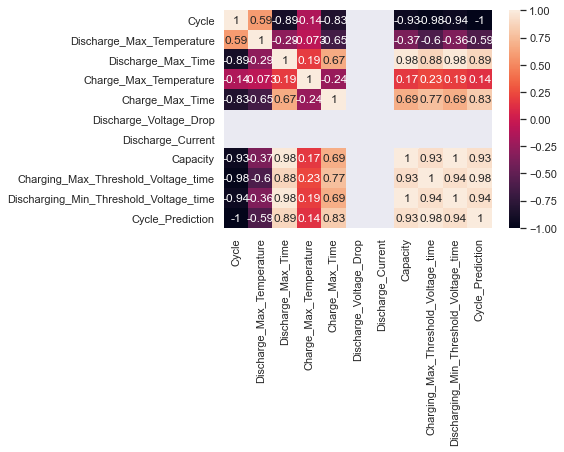

In [105]:
sns.heatmap(cycle_data.corr(),annot=True)

In [106]:
X1=cycle_data[['Charge_Max_Time','Discharge_Max_Time','Charging_Max_Threshold_Voltage_time','Discharging_Min_Threshold_Voltage_time','Capacity']].values
y1=cycle_data['Cycle_Prediction'].values

In [107]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.25, random_state=34)

In [108]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train1=mms.fit_transform(X_train1)
X_test1=mms.transform(X_test1)

In [109]:
import pickle as pkl
pkl.dump(mms,open('cycle_prediction_min_max_scaler.pkl','wb'))

<h2>1. Linear Regression</h2>

In [110]:
from sklearn.linear_model import LinearRegression
xlr=LinearRegression()
xlr.fit(X_train1,y_train1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
y_pred_test_xlr=xlr.predict(X_test1)
print(y_pred_test_xlr.shape)



(10,)


In [112]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

print('R2-Score for Train Data:',r2_score(y_pred_test_xlr,y_test1))
print('R2-Score for Test Data:',xlr.score(X_train1,y_train1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_pred_test_xlr,y_test1)))
print('Mean Absolute Error:',mean_absolute_error(y_pred_test_xlr,y_test1))

R2-Score for Train Data: 0.9839140339208116
R2-Score for Test Data: 0.9788185218517849
Root Mean Squared Error: 1.5072513231785967
Mean Absolute Error: 1.1631603798152397


Text(0.5, 1.0, 'Predicted vs Original Cycle')

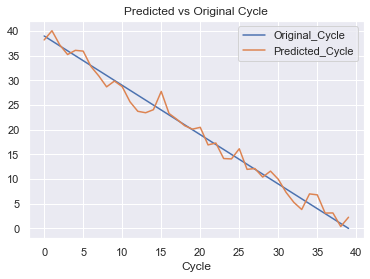

In [113]:
plt.plot(list(y1),label='Original_Cycle')
plt.plot(list(xlr.predict(mms.transform(X1))),label='Predicted_Cycle')
plt.xlabel('Cycle')
plt.legend()
plt.title('Predicted vs Original Cycle')

<h2>2.Ridge Regression</h2>

In [114]:
from sklearn.linear_model import Ridge
opt_rdg1=Ridge(alpha=0.02)
opt_rdg1.fit(X_train1,y_train1)

Ridge(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [115]:
y_pred_test1_rdg1=opt_rdg1.predict(X_test1)
y_pred_test1_rdg1.shape

(10,)

In [116]:
print('R2-Score for Train Data:',r2_score(y_pred_test1_rdg1,y_test1))
print('R2-Score for Test Data:',opt_rdg1.score(X_train1,y_train1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_pred_test1_rdg1,y_test1)))
print('Mean Absolute Error:',mean_absolute_error(y_pred_test1_rdg1,y_test1))

R2-Score for Train Data: 0.9824299145017392
R2-Score for Test Data: 0.9786116700102115
Root Mean Squared Error: 1.6012228101079065
Mean Absolute Error: 1.2304895330213568


Text(0.5, 1.0, 'Predicted vs Original Cycle')

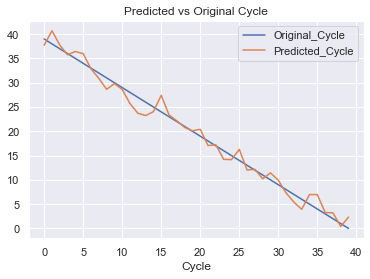

In [117]:
plt.plot(list(y1),label='Original_Cycle')
plt.plot(list(opt_rdg1.predict(mms.transform(X1))),label='Predicted_Cycle')
plt.xlabel('Cycle')
plt.legend()
plt.title('Predicted vs Original Cycle')

<h3>3. Support Vector Regressor</h3>

In [118]:
from sklearn.svm import SVR
s=SVR(C=10,kernel='linear',gamma=1)
s.fit(X_train1,y_train1)
yp=s.predict(X_test1)

In [119]:
from sklearn.metrics import r2_score,mean_squared_error
print('R2-Score for Train Data:',r2_score(y_test1,yp))
print('R2-Score for Test Data:',s.score(X_train1,y_train1))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test1,yp)))
print('Mean Absolute Error:',mean_absolute_error(yp,y_test1))

R2-Score for Train Data: 0.9807085860821173
R2-Score for Test Data: 0.9425663620767102
Root Mean Squared Error: 1.6833644259036105
Mean Absolute Error: 1.3098150121636756


Text(0.5, 1.0, 'Predicted vs Original Cycle')

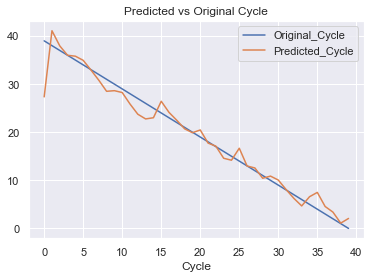

In [120]:
plt.plot(list(y1),label='Original_Cycle')
plt.plot(list(s.predict(mms.transform(X1))),label='Predicted_Cycle')
plt.xlabel('Cycle')
plt.legend()
plt.title('Predicted vs Original Cycle')

<h3>Predicting the new result</h3>

In [121]:
ans=opt_rdg1.predict(mms.transform([[1200.234,8500.234,2000.123,1000.892,1.21]]))
ans1=xlr.predict(mms.transform([[9888.750,1572.359,3577.765,1572.359,1.697507]]))
ans2=s.predict(mms.transform([[9888.750,1572.359,3577.765,1572.359,1.697507]]))
print(ans)
print(ans1)
print(ans2)

[-381.22344965]
[38.20416198]
[27.34756262]


<h3>Inference for Cycle Prediction</h3>
<p>For Cycle prediction,We are selecting suitable input features for the predicting the cycle.After that we training machine learning model for three different algorithms and finally we are checking for good r2 score and lowest root mean squared error and we are selecting the suitable model for our data based on the three different algorithms we are choosing Linear Regression for our data because it shows good r2 score and lower root mean squared error when compared to other algorithms</p>

<h3>Saving the model</h3>

In [122]:
import pickle as pkl
pkl.dump(xlr,open('cycle_prediction.pkl','wb'))